# Boston_Housing - Regression Analysis

## Import tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [3]:
tf.test.gpu_device_name()

''

# I. Boston_Housing Data_Set Load & Review

> ## 1) Load Boston_Housing Data_Set

In [4]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


> ## 2) Data_Set Information

- 'boston.csv' (506 * 14)
  - CRIM: 범죄 발생률
  - ZN: 25,000평방피트를 초과하는 거주 지역의 비율
  - INDUS: 비소매 상업 지역 비율
  - CHAS: 찰스강 인접 여부(강주변 1, 아니면 0)
  - NOX: 일산화질소 농도
  - RM: 거주 목적 방 개수
  - AGE: 1940년 이전 건축된 주택 비율
  - DIS: 보스턴 5대 고용지역까지 거리
  - RAD: 고속도로 접근성
  - TAX: 10,000달러당 재산세율
  - PTRATIO: 교사와 학생 수 비율
  - B: 흑인 거주 비율
  - LSTAT: 하위 계층 비율
  - PRICE: 주택 가격 -> 'y'

In [5]:
print(X_train.shape)
print(X_test.shape)

print(y_train[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# II. Data Preprocessing

> ## 1) standardization

- train_data & test_data

In [6]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

X_train = X_train - mean
X_train = X_train / std

X_test = X_test - mean
X_test = X_test / std

> ## 2) Train & Validation Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# III. Boston_Housing Keras Modeling

> ## 1) Model Define

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [13]:
boston.summary()

Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                896       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [14]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 3) Model fit

  - 약 8분

In [15]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 1s 3ms/step - loss: 227.1439 - mae: 11.2933 - val_loss: 47.2136 - val_mae: 4.3840
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 25.2976 - mae: 3.4406 - val_loss: 25.4533 - val_mae: 2.9273
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 18.4225 - mae: 2.9113 - val_loss: 25.6480 - val_mae: 2.8868
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 15.5904 - mae: 2.6422 - val_loss: 20.7277 - val_mae: 2.6733
Epoch 5/500
323/323 [==============================] - 1s 2ms/step - loss: 14.0583 - mae: 2.5143 - val_loss: 22.0407 - val_mae: 2.6038
Epoch 6/500
323/323 [==============================] - 1s 2ms/step - loss: 12.9689 - mae: 2.4105 - val_loss: 19.3613 - val_mae: 2.7419
Epoch 7/500
323/323 [==============================] - 1s 2ms/step - loss: 12.4278 - mae: 2.3010 - val_loss: 17.8949 - val_mae: 2.5268
Epoch 8/500
323/323 [==============================] 

> ## 4) 학습 결과 시각화

 - 전체 시각화


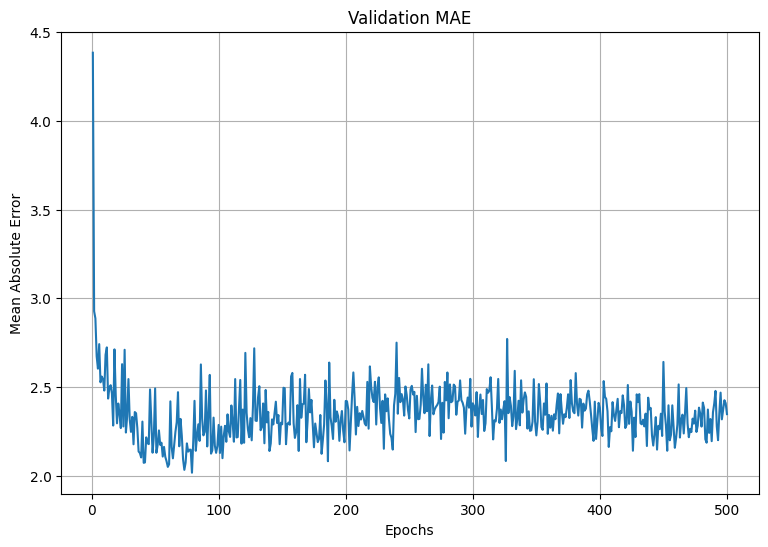

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

- 5번째 이후 MAE 확인

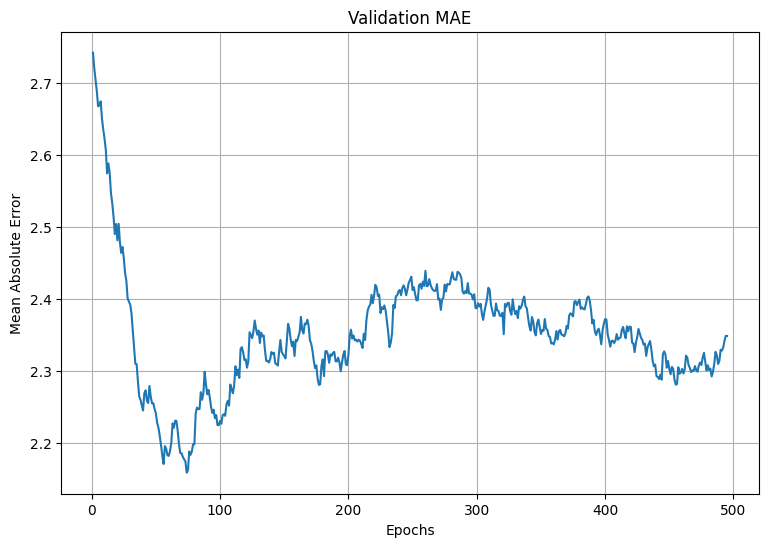

In [23]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

> ## 5) Model Evaluate

In [24]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 595.9893 - mae: 22.6017
MAE is : 22.60173797607422


> ## 6) Keras Session Clear

In [25]:
from tensorflow.keras import backend as K

K.clear_session()

# IV. Callbacks( )

> ## 1) Model Define & Compile

In [26]:
from tensorflow.keras import models, layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

> ## 2) EarlyStopping( )

- monitor : 모니터링 대상 성능
- mode : 모니터링 대상을 최소화(min) 또는 최대화(max)
- patience : 성능이 개선되지 않는 epoch 횟수

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mse',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

> ## 3) ModelCheckpoint()

- 'best_boston.h5' : 최적모델이 저장될 경로
- save_best_only : 최적모델만 저장할지 지정

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

> ## 4) Model Fit with callbacks

- callbacks : Earlystopping( ) 과 ModelCheckpoint( ) 객체 지정

In [29]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
304/323 [===========================>..] - ETA: 0s - loss: 223.9678 - mae: 11.0432


Epoch 1: val_mae improved from inf to 3.78904, saving model to best_boston.h5
323/323 [==============================] - 2s 3ms/step - loss: 212.5026 - mae: 10.6522 - val_loss: 45.5290 - val_mae: 3.7890
Epoch 2/500
313/323 [============================>.] - ETA: 0s - loss: 24.9100 - mae: 3.4696


Epoch 2: val_mae improved from 3.78904 to 3.22945, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 24.7526 - mae: 3.4767 - val_loss: 35.6736 - val_mae: 3.2295
Epoch 3/500
299/323 [==========================>...] - ETA: 0s - loss: 19.4769 - mae: 2.9445


Epoch 3: val_mae improved from 3.22945 to 2.60779, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 18.7058 - mae: 2.9072 - val_loss: 27.8423 - val_mae: 2.6078
Epoch 4/500
321/323 [============================>.] - ETA: 0s - loss: 16.8647 - mae: 2.7453


Epoch 4: val_mae improved from 2.60779 to 2.54153, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 16.7946 - mae: 2.7397 - val_loss: 24.7013 - val_mae: 2.5415
Epoch 5/500
288/323 [=========================>....] - ETA: 0s - loss: 16.0800 - mae: 2.5220


Epoch 5: val_mae did not improve from 2.54153
323/323 [==============================] - 1s 2ms/step - loss: 15.0640 - mae: 2.4701 - val_loss: 23.0919 - val_mae: 2.6199
Epoch 6/500
320/323 [============================>.] - ETA: 0s - loss: 14.0313 - mae: 2.4393


Epoch 6: val_mae improved from 2.54153 to 2.45411, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 13.9416 - mae: 2.4316 - val_loss: 19.3660 - val_mae: 2.4541
Epoch 7/500
319/323 [============================>.] - ETA: 0s - loss: 12.7886 - mae: 2.4408


Epoch 7: val_mae improved from 2.45411 to 2.40399, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 12.7204 - mae: 2.4394 - val_loss: 20.9916 - val_mae: 2.4040
Epoch 8/500
316/323 [============================>.] - ETA: 0s - loss: 11.2823 - mae: 2.2845


Epoch 8: val_mae did not improve from 2.40399
323/323 [==============================] - 1s 2ms/step - loss: 12.1048 - mae: 2.3158 - val_loss: 17.0462 - val_mae: 2.6846
Epoch 9/500
291/323 [==========================>...] - ETA: 0s - loss: 11.5668 - mae: 2.2754


Epoch 9: val_mae improved from 2.40399 to 2.32542, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 12.3053 - mae: 2.2929 - val_loss: 16.9543 - val_mae: 2.3254
Epoch 10/500
288/323 [=========================>....] - ETA: 0s - loss: 12.0821 - mae: 2.2409


Epoch 10: val_mae improved from 2.32542 to 2.23762, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 11.7179 - mae: 2.2404 - val_loss: 16.8678 - val_mae: 2.2376
Epoch 11/500
293/323 [==========================>...] - ETA: 0s - loss: 11.2875 - mae: 2.2223


Epoch 11: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 2ms/step - loss: 10.8716 - mae: 2.1986 - val_loss: 16.4474 - val_mae: 2.3350
Epoch 12/500
315/323 [============================>.] - ETA: 0s - loss: 10.6982 - mae: 2.1114


Epoch 12: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 2ms/step - loss: 10.5892 - mae: 2.1090 - val_loss: 16.8121 - val_mae: 2.3681
Epoch 13/500
318/323 [============================>.] - ETA: 0s - loss: 10.5894 - mae: 2.1390


Epoch 13: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 3ms/step - loss: 10.5267 - mae: 2.1419 - val_loss: 16.4185 - val_mae: 2.2838
Epoch 14/500
313/323 [============================>.] - ETA: 0s - loss: 9.8310 - mae: 2.0846 


Epoch 14: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 3ms/step - loss: 9.6383 - mae: 2.0740 - val_loss: 17.8428 - val_mae: 2.4399
Epoch 15/500
312/323 [===========================>..] - ETA: 0s - loss: 9.4868 - mae: 1.9788


Epoch 15: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 4ms/step - loss: 10.2048 - mae: 2.0352 - val_loss: 15.4873 - val_mae: 2.7610
Epoch 16/500
309/323 [===========================>..] - ETA: 0s - loss: 8.8590 - mae: 2.0309


Epoch 16: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 2ms/step - loss: 9.8476 - mae: 2.0842 - val_loss: 14.8852 - val_mae: 2.3270
Epoch 17/500
318/323 [============================>.] - ETA: 0s - loss: 9.4442 - mae: 2.0314


Epoch 17: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 2ms/step - loss: 9.3828 - mae: 2.0306 - val_loss: 17.3145 - val_mae: 2.5251
Epoch 18/500
315/323 [============================>.] - ETA: 0s - loss: 9.3738 - mae: 1.9836


Epoch 18: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 2ms/step - loss: 9.4334 - mae: 1.9912 - val_loss: 18.9143 - val_mae: 2.6251
Epoch 19/500
298/323 [==========================>...] - ETA: 0s - loss: 8.9905 - mae: 2.0326


Epoch 19: val_mae did not improve from 2.23762
323/323 [==============================] - 1s 2ms/step - loss: 8.5575 - mae: 1.9894 - val_loss: 18.0972 - val_mae: 2.4009
Epoch 20/500
316/323 [============================>.] - ETA: 0s - loss: 9.3267 - mae: 1.9869


Epoch 20: val_mae improved from 2.23762 to 2.11828, saving model to best_boston.h5
323/323 [==============================] - 1s 2ms/step - loss: 9.2336 - mae: 1.9852 - val_loss: 13.2861 - val_mae: 2.1183
Epoch 21/500
304/323 [===========================>..] - ETA: 0s - loss: 8.7733 - mae: 1.9456


Epoch 21: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 8.7016 - mae: 1.9577 - val_loss: 14.5588 - val_mae: 2.1734
Epoch 22/500
296/323 [==========================>...] - ETA: 0s - loss: 8.8817 - mae: 1.9444


Epoch 22: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.9701 - mae: 1.9365 - val_loss: 14.0912 - val_mae: 2.2525
Epoch 23/500
321/323 [============================>.] - ETA: 0s - loss: 8.9073 - mae: 1.9462


Epoch 23: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.9016 - mae: 1.9515 - val_loss: 16.7637 - val_mae: 2.5867
Epoch 24/500
311/323 [===========================>..] - ETA: 0s - loss: 8.3797 - mae: 1.9023


Epoch 24: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.3084 - mae: 1.9055 - val_loss: 14.8104 - val_mae: 2.2757
Epoch 25/500
318/323 [============================>.] - ETA: 0s - loss: 8.4104 - mae: 1.8737


Epoch 25: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.4018 - mae: 1.8872 - val_loss: 15.3398 - val_mae: 2.3267
Epoch 26/500
299/323 [==========================>...] - ETA: 0s - loss: 8.3438 - mae: 1.8761


Epoch 26: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 8.2636 - mae: 1.9008 - val_loss: 12.8703 - val_mae: 2.2384
Epoch 27/500
294/323 [==========================>...] - ETA: 0s - loss: 6.2480 - mae: 1.8078


Epoch 27: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.1931 - mae: 1.9030 - val_loss: 13.4106 - val_mae: 2.4581
Epoch 28/500
322/323 [============================>.] - ETA: 0s - loss: 8.2419 - mae: 1.8639


Epoch 28: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.2171 - mae: 1.8596 - val_loss: 13.4270 - val_mae: 2.3675
Epoch 29/500
292/323 [==========================>...] - ETA: 0s - loss: 7.6485 - mae: 1.8275


Epoch 29: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 8.3712 - mae: 1.8772 - val_loss: 13.4833 - val_mae: 2.1915
Epoch 30/500
318/323 [============================>.] - ETA: 0s - loss: 7.8103 - mae: 1.8739


Epoch 30: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 4ms/step - loss: 7.7306 - mae: 1.8647 - val_loss: 14.3523 - val_mae: 2.2579
Epoch 31/500
305/323 [===========================>..] - ETA: 0s - loss: 8.3763 - mae: 1.7994


Epoch 31: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 8.1317 - mae: 1.7836 - val_loss: 18.2771 - val_mae: 2.7317
Epoch 32/500
296/323 [==========================>...] - ETA: 0s - loss: 5.7866 - mae: 1.7496


Epoch 32: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 7.7250 - mae: 1.8119 - val_loss: 12.5539 - val_mae: 2.1605
Epoch 33/500
313/323 [============================>.] - ETA: 0s - loss: 8.0897 - mae: 1.7721


Epoch 33: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.9856 - mae: 1.7609 - val_loss: 13.7128 - val_mae: 2.2825
Epoch 34/500
322/323 [============================>.] - ETA: 0s - loss: 8.0047 - mae: 1.8110


Epoch 34: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.9810 - mae: 1.8072 - val_loss: 12.1515 - val_mae: 2.2784
Epoch 35/500
293/323 [==========================>...] - ETA: 0s - loss: 6.9516 - mae: 1.7378


Epoch 35: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.4016 - mae: 1.8096 - val_loss: 12.3392 - val_mae: 2.2401
Epoch 36/500
307/323 [===========================>..] - ETA: 0s - loss: 7.5460 - mae: 1.7604


Epoch 36: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 7.4315 - mae: 1.7569 - val_loss: 13.9115 - val_mae: 2.3204
Epoch 37/500
299/323 [==========================>...] - ETA: 0s - loss: 6.1041 - mae: 1.7320


Epoch 37: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.6737 - mae: 1.8128 - val_loss: 13.2167 - val_mae: 2.2607
Epoch 38/500
323/323 [==============================] - ETA: 0s - loss: 7.0789 - mae: 1.6891


Epoch 38: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 7.0789 - mae: 1.6891 - val_loss: 15.2905 - val_mae: 2.7170
Epoch 39/500
316/323 [============================>.] - ETA: 0s - loss: 7.1751 - mae: 1.7159


Epoch 39: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.1404 - mae: 1.7162 - val_loss: 12.8731 - val_mae: 2.3158
Epoch 40/500
322/323 [============================>.] - ETA: 0s - loss: 7.2463 - mae: 1.7236


Epoch 40: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.2240 - mae: 1.7188 - val_loss: 12.1267 - val_mae: 2.2329
Epoch 41/500
314/323 [============================>.] - ETA: 0s - loss: 7.2450 - mae: 1.7343


Epoch 41: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.1402 - mae: 1.7283 - val_loss: 13.2699 - val_mae: 2.3942
Epoch 42/500
289/323 [=========================>....] - ETA: 0s - loss: 5.5701 - mae: 1.6971


Epoch 42: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 7.2765 - mae: 1.7819 - val_loss: 12.0209 - val_mae: 2.1893
Epoch 43/500
313/323 [============================>.] - ETA: 0s - loss: 7.0441 - mae: 1.7277


Epoch 43: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 6.9354 - mae: 1.7177 - val_loss: 11.1766 - val_mae: 2.1947
Epoch 44/500
308/323 [===========================>..] - ETA: 0s - loss: 6.3886 - mae: 1.7116


Epoch 44: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 6.3240 - mae: 1.6989 - val_loss: 12.6555 - val_mae: 2.2756
Epoch 45/500
320/323 [============================>.] - ETA: 0s - loss: 6.8216 - mae: 1.7236


Epoch 45: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 6.8268 - mae: 1.7318 - val_loss: 11.5656 - val_mae: 2.1905
Epoch 46/500
317/323 [============================>.] - ETA: 0s - loss: 6.8473 - mae: 1.7385


Epoch 46: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 6.7460 - mae: 1.7254 - val_loss: 13.9201 - val_mae: 2.5078
Epoch 47/500
319/323 [============================>.] - ETA: 0s - loss: 6.2516 - mae: 1.6918


Epoch 47: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 6.2093 - mae: 1.6899 - val_loss: 11.3325 - val_mae: 2.1869
Epoch 48/500
319/323 [============================>.] - ETA: 0s - loss: 6.6022 - mae: 1.7238


Epoch 48: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 3ms/step - loss: 6.5476 - mae: 1.7174 - val_loss: 11.6681 - val_mae: 2.1699
Epoch 49/500
316/323 [============================>.] - ETA: 0s - loss: 5.9741 - mae: 1.5615


Epoch 49: val_mae did not improve from 2.11828
323/323 [==============================] - 1s 2ms/step - loss: 6.6534 - mae: 1.6185 - val_loss: 12.7450 - val_mae: 2.2476
Epoch 50/500
309/323 [===========================>..] - ETA: 0s - loss: 6.9295 - mae: 1.6706


Epoch 50: val_mae improved from 2.11828 to 2.04043, saving model to best_boston.h5
323/323 [==============================] - 1s 3ms/step - loss: 6.7438 - mae: 1.6495 - val_loss: 10.9280 - val_mae: 2.0404
Epoch 51/500
317/323 [============================>.] - ETA: 0s - loss: 6.2064 - mae: 1.6582


Epoch 51: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 6.2215 - mae: 1.6634 - val_loss: 11.2775 - val_mae: 2.0882
Epoch 52/500
323/323 [==============================] - ETA: 0s - loss: 6.3891 - mae: 1.6687


Epoch 52: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 6.3891 - mae: 1.6687 - val_loss: 11.2300 - val_mae: 2.1248
Epoch 53/500
313/323 [============================>.] - ETA: 0s - loss: 6.2034 - mae: 1.6539


Epoch 53: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 6.0941 - mae: 1.6366 - val_loss: 12.0723 - val_mae: 2.2810
Epoch 54/500
321/323 [============================>.] - ETA: 0s - loss: 5.9879 - mae: 1.6395


Epoch 54: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 6.0351 - mae: 1.6478 - val_loss: 12.7847 - val_mae: 2.3718
Epoch 55/500
296/323 [==========================>...] - ETA: 0s - loss: 6.0584 - mae: 1.6951


Epoch 55: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 6.0014 - mae: 1.6887 - val_loss: 14.1547 - val_mae: 2.5091
Epoch 56/500
319/323 [============================>.] - ETA: 0s - loss: 6.2369 - mae: 1.6020


Epoch 56: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 6.2335 - mae: 1.6066 - val_loss: 12.6537 - val_mae: 2.2921
Epoch 57/500
295/323 [==========================>...] - ETA: 0s - loss: 6.3235 - mae: 1.6829


Epoch 57: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 6.0030 - mae: 1.6436 - val_loss: 12.2862 - val_mae: 2.2859
Epoch 58/500
317/323 [============================>.] - ETA: 0s - loss: 6.4271 - mae: 1.6424


Epoch 58: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 6.3381 - mae: 1.6335 - val_loss: 11.0361 - val_mae: 2.0995
Epoch 59/500
304/323 [===========================>..] - ETA: 0s - loss: 5.8015 - mae: 1.6284


Epoch 59: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 5.9267 - mae: 1.6575 - val_loss: 11.9974 - val_mae: 2.1553
Epoch 60/500
310/323 [===========================>..] - ETA: 0s - loss: 5.9761 - mae: 1.6076


Epoch 60: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.8223 - mae: 1.5828 - val_loss: 13.8650 - val_mae: 2.5333
Epoch 61/500
307/323 [===========================>..] - ETA: 0s - loss: 4.5862 - mae: 1.5407


Epoch 61: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 5.9030 - mae: 1.6006 - val_loss: 10.9333 - val_mae: 2.1875
Epoch 62/500
314/323 [============================>.] - ETA: 0s - loss: 5.6089 - mae: 1.5942


Epoch 62: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 5.5880 - mae: 1.5977 - val_loss: 12.1310 - val_mae: 2.2747
Epoch 63/500
310/323 [===========================>..] - ETA: 0s - loss: 5.4879 - mae: 1.5673


Epoch 63: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 5.6507 - mae: 1.5872 - val_loss: 10.7169 - val_mae: 2.1202
Epoch 64/500
311/323 [===========================>..] - ETA: 0s - loss: 5.5109 - mae: 1.6127


Epoch 64: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.3834 - mae: 1.5948 - val_loss: 12.6080 - val_mae: 2.3013
Epoch 65/500
319/323 [============================>.] - ETA: 0s - loss: 5.3107 - mae: 1.5719


Epoch 65: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 5.3129 - mae: 1.5751 - val_loss: 12.4450 - val_mae: 2.2154
Epoch 66/500
308/323 [===========================>..] - ETA: 0s - loss: 5.4797 - mae: 1.5388


Epoch 66: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 5.3329 - mae: 1.5196 - val_loss: 11.1437 - val_mae: 2.1248
Epoch 67/500
318/323 [============================>.] - ETA: 0s - loss: 5.1465 - mae: 1.4887


Epoch 67: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.0734 - mae: 1.4737 - val_loss: 11.2343 - val_mae: 2.0659
Epoch 68/500
322/323 [============================>.] - ETA: 0s - loss: 5.1844 - mae: 1.5175


Epoch 68: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.1717 - mae: 1.5160 - val_loss: 10.7763 - val_mae: 2.0914
Epoch 69/500
304/323 [===========================>..] - ETA: 0s - loss: 5.3734 - mae: 1.5765


Epoch 69: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.1309 - mae: 1.5281 - val_loss: 11.5793 - val_mae: 2.3426
Epoch 70/500
310/323 [===========================>..] - ETA: 0s - loss: 5.4918 - mae: 1.4862


Epoch 70: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 5.3086 - mae: 1.4565 - val_loss: 10.5560 - val_mae: 2.1498
Epoch 71/500
312/323 [===========================>..] - ETA: 0s - loss: 5.3897 - mae: 1.5040


Epoch 71: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.3011 - mae: 1.5050 - val_loss: 11.0178 - val_mae: 2.0957
Epoch 72/500
308/323 [===========================>..] - ETA: 0s - loss: 5.3581 - mae: 1.4975


Epoch 72: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.2417 - mae: 1.4910 - val_loss: 13.3837 - val_mae: 2.3575
Epoch 73/500
291/323 [==========================>...] - ETA: 0s - loss: 5.6997 - mae: 1.4871


Epoch 73: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 5.4512 - mae: 1.4629 - val_loss: 11.6325 - val_mae: 2.1249
Epoch 74/500
318/323 [============================>.] - ETA: 0s - loss: 5.0638 - mae: 1.4085


Epoch 74: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 5.0235 - mae: 1.4098 - val_loss: 12.7728 - val_mae: 2.2892
Epoch 75/500
314/323 [============================>.] - ETA: 0s - loss: 4.8672 - mae: 1.4430


Epoch 75: val_mae did not improve from 2.04043
323/323 [==============================] - 2s 6ms/step - loss: 4.8101 - mae: 1.4393 - val_loss: 11.2908 - val_mae: 2.1437
Epoch 76/500
312/323 [===========================>..] - ETA: 0s - loss: 5.4824 - mae: 1.5059


Epoch 76: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.3317 - mae: 1.4851 - val_loss: 10.9944 - val_mae: 2.1934
Epoch 77/500
310/323 [===========================>..] - ETA: 0s - loss: 4.8310 - mae: 1.4571


Epoch 77: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.7992 - mae: 1.4640 - val_loss: 12.4432 - val_mae: 2.3113
Epoch 78/500
309/323 [===========================>..] - ETA: 0s - loss: 4.7701 - mae: 1.3912


Epoch 78: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.7306 - mae: 1.3998 - val_loss: 19.7083 - val_mae: 3.2789
Epoch 79/500
309/323 [===========================>..] - ETA: 0s - loss: 5.1887 - mae: 1.4591


Epoch 79: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 5.0346 - mae: 1.4421 - val_loss: 11.8823 - val_mae: 2.3175
Epoch 80/500
299/323 [==========================>...] - ETA: 0s - loss: 4.6100 - mae: 1.4473


Epoch 80: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.5057 - mae: 1.4399 - val_loss: 11.1986 - val_mae: 2.2083
Epoch 81/500
323/323 [==============================] - ETA: 0s - loss: 4.4410 - mae: 1.4199


Epoch 81: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.4410 - mae: 1.4199 - val_loss: 12.5942 - val_mae: 2.2030
Epoch 82/500
319/323 [============================>.] - ETA: 0s - loss: 4.8280 - mae: 1.4818


Epoch 82: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.8443 - mae: 1.4819 - val_loss: 12.9983 - val_mae: 2.4229
Epoch 83/500
318/323 [============================>.] - ETA: 0s - loss: 5.0268 - mae: 1.4232


Epoch 83: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.9893 - mae: 1.4198 - val_loss: 12.4564 - val_mae: 2.2009
Epoch 84/500
302/323 [===========================>..] - ETA: 0s - loss: 4.6394 - mae: 1.3892


Epoch 84: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.7166 - mae: 1.4058 - val_loss: 13.8191 - val_mae: 2.4047
Epoch 85/500
290/323 [=========================>....] - ETA: 0s - loss: 3.2559 - mae: 1.3143


Epoch 85: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.3593 - mae: 1.3919 - val_loss: 14.1432 - val_mae: 2.3265
Epoch 86/500
323/323 [==============================] - ETA: 0s - loss: 4.5950 - mae: 1.3984


Epoch 86: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.5950 - mae: 1.3984 - val_loss: 14.3631 - val_mae: 2.5619
Epoch 87/500
310/323 [===========================>..] - ETA: 0s - loss: 4.7219 - mae: 1.4459


Epoch 87: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.6139 - mae: 1.4382 - val_loss: 11.6230 - val_mae: 2.1748
Epoch 88/500
318/323 [============================>.] - ETA: 0s - loss: 4.5090 - mae: 1.3909


Epoch 88: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.4578 - mae: 1.3841 - val_loss: 11.7067 - val_mae: 2.0708
Epoch 89/500
312/323 [===========================>..] - ETA: 0s - loss: 4.7745 - mae: 1.4144


Epoch 89: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.6600 - mae: 1.3961 - val_loss: 12.1371 - val_mae: 2.2237
Epoch 90/500
303/323 [===========================>..] - ETA: 0s - loss: 4.3253 - mae: 1.3558


Epoch 90: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 4.3313 - mae: 1.3662 - val_loss: 12.3350 - val_mae: 2.2594
Epoch 91/500
292/323 [==========================>...] - ETA: 0s - loss: 4.4659 - mae: 1.4083


Epoch 91: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.3611 - mae: 1.3985 - val_loss: 13.3821 - val_mae: 2.4842
Epoch 92/500
315/323 [============================>.] - ETA: 0s - loss: 4.1177 - mae: 1.3609


Epoch 92: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.0996 - mae: 1.3570 - val_loss: 13.5251 - val_mae: 2.4522
Epoch 93/500
302/323 [===========================>..] - ETA: 0s - loss: 4.3268 - mae: 1.3971


Epoch 93: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.1545 - mae: 1.3703 - val_loss: 12.1504 - val_mae: 2.1613
Epoch 94/500
322/323 [============================>.] - ETA: 0s - loss: 4.3958 - mae: 1.3643


Epoch 94: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.4437 - mae: 1.3739 - val_loss: 10.9759 - val_mae: 2.2137
Epoch 95/500
309/323 [===========================>..] - ETA: 0s - loss: 4.3760 - mae: 1.3887


Epoch 95: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.3119 - mae: 1.3794 - val_loss: 13.6038 - val_mae: 2.3655
Epoch 96/500
313/323 [============================>.] - ETA: 0s - loss: 4.3059 - mae: 1.3438


Epoch 96: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.2821 - mae: 1.3404 - val_loss: 12.3029 - val_mae: 2.3520
Epoch 97/500
310/323 [===========================>..] - ETA: 0s - loss: 4.3162 - mae: 1.3459


Epoch 97: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.3040 - mae: 1.3489 - val_loss: 15.0188 - val_mae: 2.6742
Epoch 98/500
315/323 [============================>.] - ETA: 0s - loss: 4.3566 - mae: 1.4086


Epoch 98: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.2985 - mae: 1.4036 - val_loss: 12.6137 - val_mae: 2.3889
Epoch 99/500
316/323 [============================>.] - ETA: 0s - loss: 3.8983 - mae: 1.2592


Epoch 99: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 3.8788 - mae: 1.2599 - val_loss: 13.0562 - val_mae: 2.4477
Epoch 100/500
295/323 [==========================>...] - ETA: 0s - loss: 4.2434 - mae: 1.3461


Epoch 100: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 4.0862 - mae: 1.3351 - val_loss: 12.0640 - val_mae: 2.1266
Epoch 101/500
319/323 [============================>.] - ETA: 0s - loss: 4.2222 - mae: 1.3579


Epoch 101: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.1985 - mae: 1.3574 - val_loss: 13.0555 - val_mae: 2.2312
Epoch 102/500
298/323 [==========================>...] - ETA: 0s - loss: 4.3993 - mae: 1.3474


Epoch 102: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 4.2100 - mae: 1.3244 - val_loss: 14.1421 - val_mae: 2.4435
Epoch 103/500
316/323 [============================>.] - ETA: 0s - loss: 3.6318 - mae: 1.2603


Epoch 103: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 3.5758 - mae: 1.2507 - val_loss: 13.8298 - val_mae: 2.4521
Epoch 104/500
312/323 [===========================>..] - ETA: 0s - loss: 3.7405 - mae: 1.3258


Epoch 104: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 3.6405 - mae: 1.3051 - val_loss: 14.0542 - val_mae: 2.4824
Epoch 105/500
300/323 [==========================>...] - ETA: 0s - loss: 3.1935 - mae: 1.2738


Epoch 105: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 4ms/step - loss: 4.2481 - mae: 1.3356 - val_loss: 11.8110 - val_mae: 2.3043
Epoch 106/500
303/323 [===========================>..] - ETA: 0s - loss: 3.8377 - mae: 1.2566


Epoch 106: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.9435 - mae: 1.2885 - val_loss: 14.9598 - val_mae: 2.5037
Epoch 107/500
304/323 [===========================>..] - ETA: 0s - loss: 3.7857 - mae: 1.2805


Epoch 107: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.6750 - mae: 1.2665 - val_loss: 12.9300 - val_mae: 2.4182
Epoch 108/500
321/323 [============================>.] - ETA: 0s - loss: 3.9138 - mae: 1.3358


Epoch 108: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.9414 - mae: 1.3432 - val_loss: 11.7050 - val_mae: 2.2746
Epoch 109/500
307/323 [===========================>..] - ETA: 0s - loss: 3.6154 - mae: 1.2855


Epoch 109: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.6227 - mae: 1.2762 - val_loss: 11.5695 - val_mae: 2.3474
Epoch 110/500
310/323 [===========================>..] - ETA: 0s - loss: 3.9180 - mae: 1.2818


Epoch 110: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.8078 - mae: 1.2651 - val_loss: 12.3827 - val_mae: 2.2383
Epoch 111/500
303/323 [===========================>..] - ETA: 0s - loss: 3.7621 - mae: 1.2871


Epoch 111: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.7252 - mae: 1.2848 - val_loss: 14.4157 - val_mae: 2.4794
Epoch 112/500
304/323 [===========================>..] - ETA: 0s - loss: 3.7833 - mae: 1.3002


Epoch 112: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.6369 - mae: 1.2842 - val_loss: 13.4349 - val_mae: 2.3050
Epoch 113/500
308/323 [===========================>..] - ETA: 0s - loss: 3.7288 - mae: 1.2539


Epoch 113: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.6737 - mae: 1.2498 - val_loss: 13.6254 - val_mae: 2.3582
Epoch 114/500
310/323 [===========================>..] - ETA: 0s - loss: 3.7310 - mae: 1.2705


Epoch 114: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.6838 - mae: 1.2616 - val_loss: 13.1841 - val_mae: 2.2501
Epoch 115/500
319/323 [============================>.] - ETA: 0s - loss: 3.4776 - mae: 1.1693


Epoch 115: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.4693 - mae: 1.1725 - val_loss: 15.1085 - val_mae: 2.4618
Epoch 116/500
307/323 [===========================>..] - ETA: 0s - loss: 3.5204 - mae: 1.2331


Epoch 116: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.4772 - mae: 1.2225 - val_loss: 12.8137 - val_mae: 2.4064
Epoch 117/500
319/323 [============================>.] - ETA: 0s - loss: 3.6332 - mae: 1.2572


Epoch 117: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.6349 - mae: 1.2596 - val_loss: 13.4110 - val_mae: 2.4845
Epoch 118/500
317/323 [============================>.] - ETA: 0s - loss: 3.3365 - mae: 1.2532


Epoch 118: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.3288 - mae: 1.2575 - val_loss: 12.1015 - val_mae: 2.2500
Epoch 119/500
319/323 [============================>.] - ETA: 0s - loss: 3.4266 - mae: 1.2142


Epoch 119: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.4631 - mae: 1.2230 - val_loss: 13.3752 - val_mae: 2.3948
Epoch 120/500
306/323 [===========================>..] - ETA: 0s - loss: 3.6562 - mae: 1.3136


Epoch 120: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.5421 - mae: 1.2942 - val_loss: 11.8149 - val_mae: 2.2878
Epoch 121/500
302/323 [===========================>..] - ETA: 0s - loss: 3.6920 - mae: 1.2630


Epoch 121: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.7032 - mae: 1.2782 - val_loss: 11.8993 - val_mae: 2.3002
Epoch 122/500
311/323 [===========================>..] - ETA: 0s - loss: 3.4795 - mae: 1.1686


Epoch 122: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.3853 - mae: 1.1570 - val_loss: 12.2294 - val_mae: 2.2540
Epoch 123/500
321/323 [============================>.] - ETA: 0s - loss: 3.4456 - mae: 1.2037


Epoch 123: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 3.4313 - mae: 1.2025 - val_loss: 13.6487 - val_mae: 2.3619
Epoch 124/500
319/323 [============================>.] - ETA: 0s - loss: 3.4972 - mae: 1.2441


Epoch 124: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.4631 - mae: 1.2370 - val_loss: 14.8383 - val_mae: 2.4385
Epoch 125/500
310/323 [===========================>..] - ETA: 0s - loss: 3.3512 - mae: 1.2496


Epoch 125: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.2996 - mae: 1.2464 - val_loss: 13.4709 - val_mae: 2.5860
Epoch 126/500
304/323 [===========================>..] - ETA: 0s - loss: 3.3496 - mae: 1.2238


Epoch 126: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.3188 - mae: 1.2258 - val_loss: 15.6998 - val_mae: 2.4557
Epoch 127/500
320/323 [============================>.] - ETA: 0s - loss: 3.1322 - mae: 1.1499


Epoch 127: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.1175 - mae: 1.1502 - val_loss: 12.6991 - val_mae: 2.3228
Epoch 128/500
307/323 [===========================>..] - ETA: 0s - loss: 3.4435 - mae: 1.2471


Epoch 128: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.4187 - mae: 1.2461 - val_loss: 12.4782 - val_mae: 2.4250
Epoch 129/500
315/323 [============================>.] - ETA: 0s - loss: 3.1003 - mae: 1.2297


Epoch 129: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.0491 - mae: 1.2215 - val_loss: 13.5464 - val_mae: 2.3264
Epoch 130/500
310/323 [===========================>..] - ETA: 0s - loss: 3.0836 - mae: 1.1415


Epoch 130: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.0708 - mae: 1.1451 - val_loss: 14.0883 - val_mae: 2.3833
Epoch 131/500
322/323 [============================>.] - ETA: 0s - loss: 3.4583 - mae: 1.2297


Epoch 131: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.4476 - mae: 1.2262 - val_loss: 14.5169 - val_mae: 2.3768
Epoch 132/500
301/323 [==========================>...] - ETA: 0s - loss: 2.2467 - mae: 1.1198


Epoch 132: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.8563 - mae: 1.1513 - val_loss: 18.8742 - val_mae: 3.0400
Epoch 133/500
312/323 [===========================>..] - ETA: 0s - loss: 3.2820 - mae: 1.1919


Epoch 133: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.2744 - mae: 1.1885 - val_loss: 14.0191 - val_mae: 2.4832
Epoch 134/500
306/323 [===========================>..] - ETA: 0s - loss: 3.1271 - mae: 1.2013


Epoch 134: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.0197 - mae: 1.1731 - val_loss: 15.8636 - val_mae: 2.5145
Epoch 135/500
313/323 [============================>.] - ETA: 0s - loss: 3.1423 - mae: 1.1600


Epoch 135: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.1504 - mae: 1.1681 - val_loss: 15.3049 - val_mae: 2.5027
Epoch 136/500
298/323 [==========================>...] - ETA: 0s - loss: 2.9209 - mae: 1.1315


Epoch 136: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.8901 - mae: 1.1288 - val_loss: 14.9605 - val_mae: 2.3264
Epoch 137/500
313/323 [============================>.] - ETA: 0s - loss: 3.0530 - mae: 1.1890


Epoch 137: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.1255 - mae: 1.2107 - val_loss: 13.7427 - val_mae: 2.3929
Epoch 138/500
312/323 [===========================>..] - ETA: 0s - loss: 3.2003 - mae: 1.2105


Epoch 138: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.1086 - mae: 1.1897 - val_loss: 14.3718 - val_mae: 2.4177
Epoch 139/500
309/323 [===========================>..] - ETA: 0s - loss: 2.9350 - mae: 1.1270


Epoch 139: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.9653 - mae: 1.1484 - val_loss: 14.9648 - val_mae: 2.5094
Epoch 140/500
294/323 [==========================>...] - ETA: 0s - loss: 3.1581 - mae: 1.2088


Epoch 140: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.0095 - mae: 1.1850 - val_loss: 14.5168 - val_mae: 2.5328
Epoch 141/500
305/323 [===========================>..] - ETA: 0s - loss: 3.1332 - mae: 1.1713


Epoch 141: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 3.0613 - mae: 1.1614 - val_loss: 13.8044 - val_mae: 2.2989
Epoch 142/500
298/323 [==========================>...] - ETA: 0s - loss: 2.8607 - mae: 1.1116


Epoch 142: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.9463 - mae: 1.1342 - val_loss: 16.6728 - val_mae: 2.5034
Epoch 143/500
315/323 [============================>.] - ETA: 0s - loss: 2.9585 - mae: 1.1247


Epoch 143: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 3.0119 - mae: 1.1421 - val_loss: 15.6555 - val_mae: 2.5391
Epoch 144/500
298/323 [==========================>...] - ETA: 0s - loss: 3.0826 - mae: 1.2062


Epoch 144: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 2.9470 - mae: 1.1715 - val_loss: 15.9196 - val_mae: 2.5390
Epoch 145/500
312/323 [===========================>..] - ETA: 0s - loss: 3.0287 - mae: 1.1877


Epoch 145: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 3.0773 - mae: 1.1949 - val_loss: 14.4281 - val_mae: 2.5451
Epoch 146/500
297/323 [==========================>...] - ETA: 0s - loss: 2.9566 - mae: 1.1709


Epoch 146: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.8763 - mae: 1.1650 - val_loss: 14.8055 - val_mae: 2.4756
Epoch 147/500
296/323 [==========================>...] - ETA: 0s - loss: 2.8081 - mae: 1.1456


Epoch 147: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 2.7601 - mae: 1.1489 - val_loss: 12.1380 - val_mae: 2.3050
Epoch 148/500
310/323 [===========================>..] - ETA: 0s - loss: 3.0601 - mae: 1.1516


Epoch 148: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.9947 - mae: 1.1400 - val_loss: 16.7172 - val_mae: 2.5412
Epoch 149/500
312/323 [===========================>..] - ETA: 0s - loss: 2.8064 - mae: 1.1351


Epoch 149: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.7637 - mae: 1.1321 - val_loss: 15.5842 - val_mae: 2.4598
Epoch 150/500
309/323 [===========================>..] - ETA: 0s - loss: 2.9692 - mae: 1.1656


Epoch 150: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.9371 - mae: 1.1662 - val_loss: 14.2744 - val_mae: 2.3405
Epoch 151/500
320/323 [============================>.] - ETA: 0s - loss: 2.7847 - mae: 1.1224


Epoch 151: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.8168 - mae: 1.1319 - val_loss: 15.1780 - val_mae: 2.4247
Epoch 152/500
316/323 [============================>.] - ETA: 0s - loss: 2.8067 - mae: 1.1032


Epoch 152: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.7687 - mae: 1.0961 - val_loss: 13.9558 - val_mae: 2.2777
Epoch 153/500
301/323 [==========================>...] - ETA: 0s - loss: 2.6627 - mae: 1.1005


Epoch 153: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.5634 - mae: 1.0846 - val_loss: 13.5303 - val_mae: 2.3416
Epoch 154/500
307/323 [===========================>..] - ETA: 0s - loss: 2.5584 - mae: 1.1054


Epoch 154: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.5940 - mae: 1.1184 - val_loss: 14.1499 - val_mae: 2.4695
Epoch 155/500
316/323 [============================>.] - ETA: 0s - loss: 2.7146 - mae: 1.1422


Epoch 155: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.6682 - mae: 1.1316 - val_loss: 14.6139 - val_mae: 2.4096
Epoch 156/500
309/323 [===========================>..] - ETA: 0s - loss: 2.5948 - mae: 1.0725


Epoch 156: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.5784 - mae: 1.0796 - val_loss: 15.5954 - val_mae: 2.4912
Epoch 157/500
323/323 [==============================] - ETA: 0s - loss: 2.7503 - mae: 1.1390


Epoch 157: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.7503 - mae: 1.1390 - val_loss: 15.6589 - val_mae: 2.4167
Epoch 158/500
321/323 [============================>.] - ETA: 0s - loss: 2.6871 - mae: 1.1046


Epoch 158: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.6786 - mae: 1.1029 - val_loss: 13.3811 - val_mae: 2.5302
Epoch 159/500
320/323 [============================>.] - ETA: 0s - loss: 2.6764 - mae: 1.1540


Epoch 159: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.6641 - mae: 1.1537 - val_loss: 13.4695 - val_mae: 2.5281
Epoch 160/500
319/323 [============================>.] - ETA: 0s - loss: 2.5094 - mae: 1.0644


Epoch 160: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4832 - mae: 1.0586 - val_loss: 15.4454 - val_mae: 2.5951
Epoch 161/500
312/323 [===========================>..] - ETA: 0s - loss: 2.5159 - mae: 1.0512


Epoch 161: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.6828 - mae: 1.0825 - val_loss: 14.1080 - val_mae: 2.5167
Epoch 162/500
318/323 [============================>.] - ETA: 0s - loss: 2.5131 - mae: 1.1001


Epoch 162: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4940 - mae: 1.0972 - val_loss: 16.1604 - val_mae: 2.5120
Epoch 163/500
307/323 [===========================>..] - ETA: 0s - loss: 2.6984 - mae: 1.1392


Epoch 163: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.6242 - mae: 1.1226 - val_loss: 14.8301 - val_mae: 2.3742
Epoch 164/500
323/323 [==============================] - ETA: 0s - loss: 2.4131 - mae: 1.0910


Epoch 164: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4131 - mae: 1.0910 - val_loss: 14.6368 - val_mae: 2.3579
Epoch 165/500
312/323 [===========================>..] - ETA: 0s - loss: 2.5936 - mae: 1.1023


Epoch 165: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.5791 - mae: 1.1069 - val_loss: 14.4890 - val_mae: 2.5158
Epoch 166/500
299/323 [==========================>...] - ETA: 0s - loss: 2.1729 - mae: 1.0528


Epoch 166: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.5883 - mae: 1.0968 - val_loss: 19.9243 - val_mae: 2.8644
Epoch 167/500
301/323 [==========================>...] - ETA: 0s - loss: 2.1626 - mae: 1.0285


Epoch 167: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1809 - mae: 1.0291 - val_loss: 18.6033 - val_mae: 2.5387
Epoch 168/500
308/323 [===========================>..] - ETA: 0s - loss: 2.7003 - mae: 1.0882


Epoch 168: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.6262 - mae: 1.0733 - val_loss: 18.4291 - val_mae: 2.4933
Epoch 169/500
310/323 [===========================>..] - ETA: 0s - loss: 2.5117 - mae: 1.1454


Epoch 169: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4496 - mae: 1.1344 - val_loss: 15.7621 - val_mae: 2.5575
Epoch 170/500
316/323 [============================>.] - ETA: 0s - loss: 2.4628 - mae: 1.0918


Epoch 170: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4330 - mae: 1.0866 - val_loss: 15.7901 - val_mae: 2.4351
Epoch 171/500
293/323 [==========================>...] - ETA: 0s - loss: 2.4544 - mae: 1.1202


Epoch 171: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4964 - mae: 1.1393 - val_loss: 17.3023 - val_mae: 2.5175
Epoch 172/500
302/323 [===========================>..] - ETA: 0s - loss: 2.2491 - mae: 1.0506


Epoch 172: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.3413 - mae: 1.0784 - val_loss: 14.6047 - val_mae: 2.3882
Epoch 173/500
298/323 [==========================>...] - ETA: 0s - loss: 2.3572 - mae: 1.0469


Epoch 173: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.3181 - mae: 1.0458 - val_loss: 15.8190 - val_mae: 2.6094
Epoch 174/500
313/323 [============================>.] - ETA: 0s - loss: 2.4050 - mae: 1.0602


Epoch 174: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.3831 - mae: 1.0601 - val_loss: 13.8664 - val_mae: 2.5742
Epoch 175/500
301/323 [==========================>...] - ETA: 0s - loss: 2.4746 - mae: 1.0500


Epoch 175: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4791 - mae: 1.0598 - val_loss: 15.9744 - val_mae: 2.3655
Epoch 176/500
294/323 [==========================>...] - ETA: 0s - loss: 2.5205 - mae: 1.0749


Epoch 176: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4098 - mae: 1.0623 - val_loss: 14.8167 - val_mae: 2.4743
Epoch 177/500
319/323 [============================>.] - ETA: 0s - loss: 2.4421 - mae: 1.0845


Epoch 177: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4131 - mae: 1.0750 - val_loss: 14.5382 - val_mae: 2.5071
Epoch 178/500
305/323 [===========================>..] - ETA: 0s - loss: 2.3063 - mae: 1.0593


Epoch 178: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 2.3816 - mae: 1.0679 - val_loss: 14.8083 - val_mae: 2.3897
Epoch 179/500
317/323 [============================>.] - ETA: 0s - loss: 2.2313 - mae: 1.0458


Epoch 179: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.2237 - mae: 1.0447 - val_loss: 15.2461 - val_mae: 2.7491
Epoch 180/500
317/323 [============================>.] - ETA: 0s - loss: 2.0535 - mae: 1.0136


Epoch 180: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0557 - mae: 1.0210 - val_loss: 17.1186 - val_mae: 2.5611
Epoch 181/500
307/323 [===========================>..] - ETA: 0s - loss: 2.1935 - mae: 1.0319


Epoch 181: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1682 - mae: 1.0298 - val_loss: 17.1144 - val_mae: 2.6510
Epoch 182/500
303/323 [===========================>..] - ETA: 0s - loss: 2.1157 - mae: 1.0644


Epoch 182: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0573 - mae: 1.0552 - val_loss: 16.7687 - val_mae: 2.6263
Epoch 183/500
320/323 [============================>.] - ETA: 0s - loss: 2.2695 - mae: 1.0674


Epoch 183: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.2568 - mae: 1.0660 - val_loss: 13.8814 - val_mae: 2.3335
Epoch 184/500
312/323 [===========================>..] - ETA: 0s - loss: 2.2720 - mae: 1.0669


Epoch 184: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.2437 - mae: 1.0634 - val_loss: 13.4899 - val_mae: 2.4384
Epoch 185/500
315/323 [============================>.] - ETA: 0s - loss: 2.2196 - mae: 1.0445


Epoch 185: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1905 - mae: 1.0373 - val_loss: 17.6316 - val_mae: 2.7874
Epoch 186/500
299/323 [==========================>...] - ETA: 0s - loss: 2.4438 - mae: 1.0853


Epoch 186: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.3115 - mae: 1.0519 - val_loss: 14.1524 - val_mae: 2.4368
Epoch 187/500
313/323 [============================>.] - ETA: 0s - loss: 2.5348 - mae: 1.1022


Epoch 187: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.4722 - mae: 1.0866 - val_loss: 17.7031 - val_mae: 2.5623
Epoch 188/500
313/323 [============================>.] - ETA: 0s - loss: 2.1327 - mae: 1.0489


Epoch 188: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1271 - mae: 1.0540 - val_loss: 16.7123 - val_mae: 2.6300
Epoch 189/500
310/323 [===========================>..] - ETA: 0s - loss: 2.0318 - mae: 1.0129


Epoch 189: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0334 - mae: 1.0180 - val_loss: 14.6621 - val_mae: 2.3865
Epoch 190/500
305/323 [===========================>..] - ETA: 0s - loss: 2.2739 - mae: 1.0349


Epoch 190: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.2365 - mae: 1.0306 - val_loss: 13.9155 - val_mae: 2.5859
Epoch 191/500
298/323 [==========================>...] - ETA: 0s - loss: 2.1342 - mae: 1.0290


Epoch 191: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0644 - mae: 1.0118 - val_loss: 14.4580 - val_mae: 2.5238
Epoch 192/500
302/323 [===========================>..] - ETA: 0s - loss: 1.8738 - mae: 0.9904


Epoch 192: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8274 - mae: 0.9823 - val_loss: 12.9938 - val_mae: 2.3298
Epoch 193/500
313/323 [============================>.] - ETA: 0s - loss: 2.0393 - mae: 1.0533


Epoch 193: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.9963 - mae: 1.0366 - val_loss: 14.9081 - val_mae: 2.5510
Epoch 194/500
313/323 [============================>.] - ETA: 0s - loss: 1.9451 - mae: 1.0558


Epoch 194: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0038 - mae: 1.0647 - val_loss: 15.1993 - val_mae: 2.3384
Epoch 195/500
304/323 [===========================>..] - ETA: 0s - loss: 2.2651 - mae: 1.0476


Epoch 195: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.2122 - mae: 1.0407 - val_loss: 13.9546 - val_mae: 2.3678
Epoch 196/500
301/323 [==========================>...] - ETA: 0s - loss: 1.7810 - mae: 0.9895


Epoch 196: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1788 - mae: 1.0252 - val_loss: 13.9150 - val_mae: 2.2730
Epoch 197/500
305/323 [===========================>..] - ETA: 0s - loss: 2.1276 - mae: 1.0294


Epoch 197: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 2.0890 - mae: 1.0218 - val_loss: 13.1125 - val_mae: 2.4681
Epoch 198/500
313/323 [============================>.] - ETA: 0s - loss: 2.0401 - mae: 1.0403


Epoch 198: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 2.0232 - mae: 1.0381 - val_loss: 16.2809 - val_mae: 2.5599
Epoch 199/500
316/323 [============================>.] - ETA: 0s - loss: 1.9566 - mae: 1.0020


Epoch 199: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0502 - mae: 1.0232 - val_loss: 13.6870 - val_mae: 2.4179
Epoch 200/500
303/323 [===========================>..] - ETA: 0s - loss: 2.1747 - mae: 1.0738


Epoch 200: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1580 - mae: 1.0793 - val_loss: 14.1318 - val_mae: 2.3255
Epoch 201/500
303/323 [===========================>..] - ETA: 0s - loss: 1.7013 - mae: 0.9492


Epoch 201: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.1175 - mae: 0.9971 - val_loss: 15.3934 - val_mae: 2.5027
Epoch 202/500
307/323 [===========================>..] - ETA: 0s - loss: 1.7310 - mae: 0.9407


Epoch 202: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0329 - mae: 0.9840 - val_loss: 17.8872 - val_mae: 2.6243
Epoch 203/500
301/323 [==========================>...] - ETA: 0s - loss: 1.8792 - mae: 0.9700


Epoch 203: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8972 - mae: 0.9854 - val_loss: 14.3234 - val_mae: 2.5894
Epoch 204/500
308/323 [===========================>..] - ETA: 0s - loss: 2.0032 - mae: 0.9891


Epoch 204: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.9925 - mae: 0.9867 - val_loss: 14.9471 - val_mae: 2.4137
Epoch 205/500
299/323 [==========================>...] - ETA: 0s - loss: 1.9431 - mae: 1.0163


Epoch 205: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8826 - mae: 1.0017 - val_loss: 17.9215 - val_mae: 2.7007
Epoch 206/500
299/323 [==========================>...] - ETA: 0s - loss: 1.8236 - mae: 1.0187


Epoch 206: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0541 - mae: 1.0505 - val_loss: 18.9940 - val_mae: 2.6200
Epoch 207/500
320/323 [============================>.] - ETA: 0s - loss: 2.0902 - mae: 1.0435


Epoch 207: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0770 - mae: 1.0399 - val_loss: 15.1319 - val_mae: 2.4458
Epoch 208/500
303/323 [===========================>..] - ETA: 0s - loss: 1.8240 - mae: 0.9635


Epoch 208: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8858 - mae: 0.9870 - val_loss: 15.2601 - val_mae: 2.3972
Epoch 209/500
294/323 [==========================>...] - ETA: 0s - loss: 1.7915 - mae: 1.0057


Epoch 209: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8225 - mae: 1.0240 - val_loss: 15.6500 - val_mae: 2.5602
Epoch 210/500
301/323 [==========================>...] - ETA: 0s - loss: 2.0138 - mae: 1.0081


Epoch 210: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.9086 - mae: 0.9749 - val_loss: 16.4999 - val_mae: 2.6050
Epoch 211/500
304/323 [===========================>..] - ETA: 0s - loss: 2.1280 - mae: 1.0080


Epoch 211: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0864 - mae: 0.9941 - val_loss: 16.0087 - val_mae: 2.5968
Epoch 212/500
307/323 [===========================>..] - ETA: 0s - loss: 1.7442 - mae: 0.9954


Epoch 212: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7425 - mae: 0.9943 - val_loss: 14.8681 - val_mae: 2.5915
Epoch 213/500
305/323 [===========================>..] - ETA: 0s - loss: 1.7113 - mae: 0.9570


Epoch 213: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7657 - mae: 0.9745 - val_loss: 16.8308 - val_mae: 2.6830
Epoch 214/500
309/323 [===========================>..] - ETA: 0s - loss: 1.6714 - mae: 0.9512


Epoch 214: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6794 - mae: 0.9509 - val_loss: 16.3087 - val_mae: 2.5165
Epoch 215/500
304/323 [===========================>..] - ETA: 0s - loss: 1.9089 - mae: 0.9997


Epoch 215: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.0015 - mae: 1.0233 - val_loss: 13.6029 - val_mae: 2.4398
Epoch 216/500
310/323 [===========================>..] - ETA: 0s - loss: 1.8120 - mae: 0.9321


Epoch 216: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8328 - mae: 0.9432 - val_loss: 17.6992 - val_mae: 2.6039
Epoch 217/500
304/323 [===========================>..] - ETA: 0s - loss: 1.8996 - mae: 0.9986


Epoch 217: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.8422 - mae: 0.9798 - val_loss: 14.3080 - val_mae: 2.4198
Epoch 218/500
309/323 [===========================>..] - ETA: 0s - loss: 1.8994 - mae: 0.9391


Epoch 218: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.8933 - mae: 0.9463 - val_loss: 16.5681 - val_mae: 2.5192
Epoch 219/500
310/323 [===========================>..] - ETA: 0s - loss: 1.8632 - mae: 0.9819


Epoch 219: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8663 - mae: 0.9844 - val_loss: 13.5504 - val_mae: 2.4753
Epoch 220/500
319/323 [============================>.] - ETA: 0s - loss: 1.7007 - mae: 0.9145


Epoch 220: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7002 - mae: 0.9158 - val_loss: 16.6621 - val_mae: 2.5368
Epoch 221/500
305/323 [===========================>..] - ETA: 0s - loss: 2.2712 - mae: 1.0344


Epoch 221: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 2.2166 - mae: 1.0273 - val_loss: 15.1694 - val_mae: 2.4245
Epoch 222/500
311/323 [===========================>..] - ETA: 0s - loss: 1.7630 - mae: 0.9439


Epoch 222: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7902 - mae: 0.9530 - val_loss: 15.3937 - val_mae: 2.4419
Epoch 223/500
304/323 [===========================>..] - ETA: 0s - loss: 1.7100 - mae: 0.9189


Epoch 223: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6807 - mae: 0.9178 - val_loss: 18.9400 - val_mae: 2.7431
Epoch 224/500
304/323 [===========================>..] - ETA: 0s - loss: 1.4103 - mae: 0.9024


Epoch 224: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5977 - mae: 0.9267 - val_loss: 16.8863 - val_mae: 2.5650
Epoch 225/500
305/323 [===========================>..] - ETA: 0s - loss: 1.7753 - mae: 0.9225


Epoch 225: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7501 - mae: 0.9249 - val_loss: 17.6032 - val_mae: 2.5738
Epoch 226/500
311/323 [===========================>..] - ETA: 0s - loss: 2.0107 - mae: 0.9877


Epoch 226: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.9669 - mae: 0.9787 - val_loss: 17.3131 - val_mae: 2.5287
Epoch 227/500
299/323 [==========================>...] - ETA: 0s - loss: 1.7419 - mae: 0.9410


Epoch 227: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7478 - mae: 0.9341 - val_loss: 16.7795 - val_mae: 2.5168
Epoch 228/500
301/323 [==========================>...] - ETA: 0s - loss: 1.6833 - mae: 0.9225


Epoch 228: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6433 - mae: 0.9218 - val_loss: 17.0597 - val_mae: 2.5278
Epoch 229/500
299/323 [==========================>...] - ETA: 0s - loss: 1.7458 - mae: 0.9173


Epoch 229: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7933 - mae: 0.9361 - val_loss: 14.9975 - val_mae: 2.4774
Epoch 230/500
301/323 [==========================>...] - ETA: 0s - loss: 1.7026 - mae: 0.9270


Epoch 230: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6839 - mae: 0.9236 - val_loss: 17.8154 - val_mae: 2.6744
Epoch 231/500
310/323 [===========================>..] - ETA: 0s - loss: 1.7595 - mae: 0.9309


Epoch 231: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7429 - mae: 0.9309 - val_loss: 16.0208 - val_mae: 2.6325
Epoch 232/500
298/323 [==========================>...] - ETA: 0s - loss: 1.5814 - mae: 0.9304


Epoch 232: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6558 - mae: 0.9576 - val_loss: 16.8642 - val_mae: 2.5341
Epoch 233/500
314/323 [============================>.] - ETA: 0s - loss: 1.7533 - mae: 0.9272


Epoch 233: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7667 - mae: 0.9338 - val_loss: 15.9355 - val_mae: 2.5547
Epoch 234/500
308/323 [===========================>..] - ETA: 0s - loss: 1.7285 - mae: 0.9435


Epoch 234: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7055 - mae: 0.9426 - val_loss: 15.6421 - val_mae: 2.4962
Epoch 235/500
303/323 [===========================>..] - ETA: 0s - loss: 1.7104 - mae: 0.9277


Epoch 235: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.6959 - mae: 0.9241 - val_loss: 15.7175 - val_mae: 2.4945
Epoch 236/500
305/323 [===========================>..] - ETA: 0s - loss: 1.5375 - mae: 0.9013


Epoch 236: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.5894 - mae: 0.9101 - val_loss: 18.1438 - val_mae: 2.6779
Epoch 237/500
316/323 [============================>.] - ETA: 0s - loss: 1.6875 - mae: 0.9235


Epoch 237: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.6840 - mae: 0.9219 - val_loss: 16.3023 - val_mae: 2.5517
Epoch 238/500
301/323 [==========================>...] - ETA: 0s - loss: 1.6142 - mae: 0.9080


Epoch 238: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6535 - mae: 0.9176 - val_loss: 17.1520 - val_mae: 2.6423
Epoch 239/500
303/323 [===========================>..] - ETA: 0s - loss: 1.5646 - mae: 0.9240


Epoch 239: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.6198 - mae: 0.9337 - val_loss: 14.5811 - val_mae: 2.4688
Epoch 240/500
320/323 [============================>.] - ETA: 0s - loss: 1.5878 - mae: 0.8912


Epoch 240: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6118 - mae: 0.8997 - val_loss: 16.7438 - val_mae: 2.5829
Epoch 241/500
305/323 [===========================>..] - ETA: 0s - loss: 1.4672 - mae: 0.9228


Epoch 241: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.5243 - mae: 0.9393 - val_loss: 17.9005 - val_mae: 2.6845
Epoch 242/500
306/323 [===========================>..] - ETA: 0s - loss: 1.8030 - mae: 0.9511


Epoch 242: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.8545 - mae: 0.9534 - val_loss: 15.6908 - val_mae: 2.4492
Epoch 243/500
301/323 [==========================>...] - ETA: 0s - loss: 1.5165 - mae: 0.8837


Epoch 243: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4889 - mae: 0.8778 - val_loss: 16.0885 - val_mae: 2.5279
Epoch 244/500
299/323 [==========================>...] - ETA: 0s - loss: 1.5195 - mae: 0.9370


Epoch 244: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5058 - mae: 0.9376 - val_loss: 15.7668 - val_mae: 2.5715
Epoch 245/500
319/323 [============================>.] - ETA: 0s - loss: 1.5951 - mae: 0.9221


Epoch 245: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5939 - mae: 0.9250 - val_loss: 18.6659 - val_mae: 2.7277
Epoch 246/500
302/323 [===========================>..] - ETA: 0s - loss: 1.5051 - mae: 0.9222


Epoch 246: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6150 - mae: 0.9515 - val_loss: 17.0110 - val_mae: 2.6596
Epoch 247/500
307/323 [===========================>..] - ETA: 0s - loss: 1.7542 - mae: 0.9149


Epoch 247: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.7253 - mae: 0.9163 - val_loss: 15.9357 - val_mae: 2.6036
Epoch 248/500
301/323 [==========================>...] - ETA: 0s - loss: 1.5643 - mae: 0.9013


Epoch 248: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5329 - mae: 0.8957 - val_loss: 18.1276 - val_mae: 2.6100
Epoch 249/500
301/323 [==========================>...] - ETA: 0s - loss: 1.6740 - mae: 0.9178


Epoch 249: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6111 - mae: 0.8967 - val_loss: 14.0094 - val_mae: 2.5155
Epoch 250/500
310/323 [===========================>..] - ETA: 0s - loss: 1.3805 - mae: 0.8803


Epoch 250: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4707 - mae: 0.9033 - val_loss: 16.4771 - val_mae: 2.6261
Epoch 251/500
301/323 [==========================>...] - ETA: 0s - loss: 1.5755 - mae: 0.9140


Epoch 251: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5285 - mae: 0.8991 - val_loss: 18.0006 - val_mae: 2.6648
Epoch 252/500
322/323 [============================>.] - ETA: 0s - loss: 1.4747 - mae: 0.9143


Epoch 252: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4779 - mae: 0.9164 - val_loss: 15.6577 - val_mae: 2.4565
Epoch 253/500
323/323 [==============================] - ETA: 0s - loss: 1.6984 - mae: 0.9092


Epoch 253: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6984 - mae: 0.9092 - val_loss: 19.1785 - val_mae: 2.7020
Epoch 254/500
307/323 [===========================>..] - ETA: 0s - loss: 1.4570 - mae: 0.8863


Epoch 254: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.5472 - mae: 0.9098 - val_loss: 15.3439 - val_mae: 2.5211
Epoch 255/500
322/323 [============================>.] - ETA: 0s - loss: 1.4489 - mae: 0.8873


Epoch 255: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.4444 - mae: 0.8850 - val_loss: 14.4719 - val_mae: 2.5079
Epoch 256/500
296/323 [==========================>...] - ETA: 0s - loss: 1.5883 - mae: 0.9199


Epoch 256: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6051 - mae: 0.9178 - val_loss: 15.7036 - val_mae: 2.4506
Epoch 257/500
310/323 [===========================>..] - ETA: 0s - loss: 1.4829 - mae: 0.8792


Epoch 257: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4668 - mae: 0.8798 - val_loss: 14.1517 - val_mae: 2.3551
Epoch 258/500
306/323 [===========================>..] - ETA: 0s - loss: 1.5530 - mae: 0.9219


Epoch 258: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5414 - mae: 0.9243 - val_loss: 15.8830 - val_mae: 2.5110
Epoch 259/500
295/323 [==========================>...] - ETA: 0s - loss: 1.6547 - mae: 0.8899


Epoch 259: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.6009 - mae: 0.8814 - val_loss: 15.0085 - val_mae: 2.5400
Epoch 260/500
304/323 [===========================>..] - ETA: 0s - loss: 1.3802 - mae: 0.8935


Epoch 260: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4965 - mae: 0.9065 - val_loss: 16.3857 - val_mae: 2.5145
Epoch 261/500
311/323 [===========================>..] - ETA: 0s - loss: 1.3882 - mae: 0.8591


Epoch 261: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3570 - mae: 0.8508 - val_loss: 16.3265 - val_mae: 2.7136
Epoch 262/500
300/323 [==========================>...] - ETA: 0s - loss: 1.3302 - mae: 0.8805


Epoch 262: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3246 - mae: 0.8773 - val_loss: 16.6927 - val_mae: 2.7313
Epoch 263/500
305/323 [===========================>..] - ETA: 0s - loss: 1.4905 - mae: 0.8725


Epoch 263: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5486 - mae: 0.8858 - val_loss: 15.6913 - val_mae: 2.5760
Epoch 264/500
302/323 [===========================>..] - ETA: 0s - loss: 1.4153 - mae: 0.8651


Epoch 264: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4534 - mae: 0.8666 - val_loss: 17.5929 - val_mae: 2.5928
Epoch 265/500
302/323 [===========================>..] - ETA: 0s - loss: 1.4718 - mae: 0.8820


Epoch 265: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4942 - mae: 0.8845 - val_loss: 15.7522 - val_mae: 2.5128
Epoch 266/500
321/323 [============================>.] - ETA: 0s - loss: 1.5831 - mae: 0.8996


Epoch 266: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5907 - mae: 0.9028 - val_loss: 17.0079 - val_mae: 2.6535
Epoch 267/500
297/323 [==========================>...] - ETA: 0s - loss: 1.2896 - mae: 0.8555


Epoch 267: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2751 - mae: 0.8432 - val_loss: 14.6023 - val_mae: 2.5509
Epoch 268/500
315/323 [============================>.] - ETA: 0s - loss: 1.5598 - mae: 0.9199


Epoch 268: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5502 - mae: 0.9193 - val_loss: 14.8895 - val_mae: 2.4585
Epoch 269/500
308/323 [===========================>..] - ETA: 0s - loss: 1.4582 - mae: 0.9050


Epoch 269: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4857 - mae: 0.9088 - val_loss: 15.0177 - val_mae: 2.5557
Epoch 270/500
305/323 [===========================>..] - ETA: 0s - loss: 1.6024 - mae: 0.8931


Epoch 270: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5635 - mae: 0.8851 - val_loss: 14.9269 - val_mae: 2.4603
Epoch 271/500
308/323 [===========================>..] - ETA: 0s - loss: 1.3521 - mae: 0.8545


Epoch 271: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4342 - mae: 0.8726 - val_loss: 17.4195 - val_mae: 2.6453
Epoch 272/500
298/323 [==========================>...] - ETA: 0s - loss: 1.6047 - mae: 0.9222


Epoch 272: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.5605 - mae: 0.9134 - val_loss: 15.3644 - val_mae: 2.5489
Epoch 273/500
309/323 [===========================>..] - ETA: 0s - loss: 1.3443 - mae: 0.8611


Epoch 273: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3872 - mae: 0.8780 - val_loss: 15.2792 - val_mae: 2.6074
Epoch 274/500
319/323 [============================>.] - ETA: 0s - loss: 1.2909 - mae: 0.8448


Epoch 274: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.3557 - mae: 0.8573 - val_loss: 16.9335 - val_mae: 2.5832
Epoch 275/500
320/323 [============================>.] - ETA: 0s - loss: 1.3667 - mae: 0.8668


Epoch 275: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3561 - mae: 0.8631 - val_loss: 16.3292 - val_mae: 2.6233
Epoch 276/500
304/323 [===========================>..] - ETA: 0s - loss: 1.3782 - mae: 0.8651


Epoch 276: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3487 - mae: 0.8555 - val_loss: 16.5406 - val_mae: 2.5759
Epoch 277/500
303/323 [===========================>..] - ETA: 0s - loss: 1.3824 - mae: 0.8652


Epoch 277: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3847 - mae: 0.8636 - val_loss: 15.9322 - val_mae: 2.4726
Epoch 278/500
307/323 [===========================>..] - ETA: 0s - loss: 1.6139 - mae: 0.9187


Epoch 278: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.5942 - mae: 0.9172 - val_loss: 16.1082 - val_mae: 2.5332
Epoch 279/500
306/323 [===========================>..] - ETA: 0s - loss: 1.2792 - mae: 0.8229


Epoch 279: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3939 - mae: 0.8507 - val_loss: 16.4128 - val_mae: 2.5792
Epoch 280/500
302/323 [===========================>..] - ETA: 0s - loss: 1.2619 - mae: 0.8367


Epoch 280: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2468 - mae: 0.8290 - val_loss: 16.7082 - val_mae: 2.6474
Epoch 281/500
290/323 [=========================>....] - ETA: 0s - loss: 1.3381 - mae: 0.8592


Epoch 281: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2961 - mae: 0.8472 - val_loss: 16.1357 - val_mae: 2.4593
Epoch 282/500
301/323 [==========================>...] - ETA: 0s - loss: 1.3885 - mae: 0.8864


Epoch 282: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3628 - mae: 0.8837 - val_loss: 14.8171 - val_mae: 2.5229
Epoch 283/500
318/323 [============================>.] - ETA: 0s - loss: 1.4050 - mae: 0.8620


Epoch 283: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3915 - mae: 0.8568 - val_loss: 15.9937 - val_mae: 2.7154
Epoch 284/500
295/323 [==========================>...] - ETA: 0s - loss: 1.2855 - mae: 0.8521


Epoch 284: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2479 - mae: 0.8441 - val_loss: 15.3476 - val_mae: 2.5094
Epoch 285/500
304/323 [===========================>..] - ETA: 0s - loss: 1.3607 - mae: 0.8545


Epoch 285: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3567 - mae: 0.8592 - val_loss: 16.4355 - val_mae: 2.5980
Epoch 286/500
323/323 [==============================] - ETA: 0s - loss: 1.3854 - mae: 0.8663


Epoch 286: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3854 - mae: 0.8663 - val_loss: 17.0165 - val_mae: 2.5329
Epoch 287/500
312/323 [===========================>..] - ETA: 0s - loss: 1.2883 - mae: 0.8153


Epoch 287: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3058 - mae: 0.8213 - val_loss: 17.1768 - val_mae: 2.5982
Epoch 288/500
316/323 [============================>.] - ETA: 0s - loss: 1.2591 - mae: 0.7922


Epoch 288: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2713 - mae: 0.7978 - val_loss: 17.6161 - val_mae: 2.6445
Epoch 289/500
298/323 [==========================>...] - ETA: 0s - loss: 1.1505 - mae: 0.8193


Epoch 289: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1534 - mae: 0.8199 - val_loss: 16.2280 - val_mae: 2.6966
Epoch 290/500
304/323 [===========================>..] - ETA: 0s - loss: 1.1994 - mae: 0.8127


Epoch 290: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2364 - mae: 0.8275 - val_loss: 15.5544 - val_mae: 2.5558
Epoch 291/500
313/323 [============================>.] - ETA: 0s - loss: 1.3643 - mae: 0.8396


Epoch 291: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3621 - mae: 0.8398 - val_loss: 14.8727 - val_mae: 2.6332
Epoch 292/500
314/323 [============================>.] - ETA: 0s - loss: 1.3886 - mae: 0.8516


Epoch 292: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.3730 - mae: 0.8480 - val_loss: 14.4867 - val_mae: 2.3999
Epoch 293/500
299/323 [==========================>...] - ETA: 0s - loss: 1.2251 - mae: 0.8084


Epoch 293: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.2050 - mae: 0.7984 - val_loss: 16.4113 - val_mae: 2.5706
Epoch 294/500
294/323 [==========================>...] - ETA: 0s - loss: 1.1944 - mae: 0.8086


Epoch 294: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3184 - mae: 0.8469 - val_loss: 15.6738 - val_mae: 2.5413
Epoch 295/500
303/323 [===========================>..] - ETA: 0s - loss: 1.2661 - mae: 0.8253


Epoch 295: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3343 - mae: 0.8431 - val_loss: 14.8932 - val_mae: 2.5441
Epoch 296/500
301/323 [==========================>...] - ETA: 0s - loss: 1.3147 - mae: 0.8739


Epoch 296: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3342 - mae: 0.8781 - val_loss: 14.3255 - val_mae: 2.4151
Epoch 297/500
319/323 [============================>.] - ETA: 0s - loss: 1.1514 - mae: 0.8138


Epoch 297: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1423 - mae: 0.8106 - val_loss: 14.6133 - val_mae: 2.4994
Epoch 298/500
295/323 [==========================>...] - ETA: 0s - loss: 1.3311 - mae: 0.8337


Epoch 298: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3625 - mae: 0.8422 - val_loss: 14.5492 - val_mae: 2.4155
Epoch 299/500
296/323 [==========================>...] - ETA: 0s - loss: 1.2985 - mae: 0.8170


Epoch 299: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2566 - mae: 0.8030 - val_loss: 16.9385 - val_mae: 2.6575
Epoch 300/500
301/323 [==========================>...] - ETA: 0s - loss: 1.3932 - mae: 0.8808


Epoch 300: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.4437 - mae: 0.8943 - val_loss: 16.2674 - val_mae: 2.6012
Epoch 301/500
299/323 [==========================>...] - ETA: 0s - loss: 1.1671 - mae: 0.7710


Epoch 301: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1637 - mae: 0.7750 - val_loss: 15.9902 - val_mae: 2.6670
Epoch 302/500
293/323 [==========================>...] - ETA: 0s - loss: 1.2738 - mae: 0.8294


Epoch 302: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2142 - mae: 0.8136 - val_loss: 16.2506 - val_mae: 2.6364
Epoch 303/500
295/323 [==========================>...] - ETA: 0s - loss: 1.2873 - mae: 0.8413


Epoch 303: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3483 - mae: 0.8558 - val_loss: 16.3271 - val_mae: 2.5806
Epoch 304/500
295/323 [==========================>...] - ETA: 0s - loss: 1.1750 - mae: 0.8268


Epoch 304: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1440 - mae: 0.8160 - val_loss: 15.7581 - val_mae: 2.5982
Epoch 305/500
299/323 [==========================>...] - ETA: 0s - loss: 1.3034 - mae: 0.8349


Epoch 305: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2915 - mae: 0.8269 - val_loss: 14.7134 - val_mae: 2.4191
Epoch 306/500
295/323 [==========================>...] - ETA: 0s - loss: 1.0903 - mae: 0.7713


Epoch 306: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0594 - mae: 0.7615 - val_loss: 15.3609 - val_mae: 2.5173
Epoch 307/500
298/323 [==========================>...] - ETA: 0s - loss: 1.1060 - mae: 0.7842


Epoch 307: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1123 - mae: 0.7830 - val_loss: 17.1791 - val_mae: 2.6373
Epoch 308/500
303/323 [===========================>..] - ETA: 0s - loss: 1.3892 - mae: 0.8608


Epoch 308: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3463 - mae: 0.8470 - val_loss: 17.0456 - val_mae: 2.5880
Epoch 309/500
297/323 [==========================>...] - ETA: 0s - loss: 1.3198 - mae: 0.8117


Epoch 309: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3504 - mae: 0.8238 - val_loss: 17.0015 - val_mae: 2.7026
Epoch 310/500
314/323 [============================>.] - ETA: 0s - loss: 1.2515 - mae: 0.8110


Epoch 310: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2303 - mae: 0.8034 - val_loss: 17.5536 - val_mae: 2.6935
Epoch 311/500
302/323 [===========================>..] - ETA: 0s - loss: 1.1859 - mae: 0.7795


Epoch 311: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.1759 - mae: 0.7805 - val_loss: 19.8481 - val_mae: 2.9633
Epoch 312/500
319/323 [============================>.] - ETA: 0s - loss: 1.3337 - mae: 0.8426


Epoch 312: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.3321 - mae: 0.8441 - val_loss: 14.6925 - val_mae: 2.4976
Epoch 313/500
322/323 [============================>.] - ETA: 0s - loss: 1.3101 - mae: 0.8757


Epoch 313: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3071 - mae: 0.8748 - val_loss: 14.9778 - val_mae: 2.5989
Epoch 314/500
299/323 [==========================>...] - ETA: 0s - loss: 1.1590 - mae: 0.8190


Epoch 314: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1627 - mae: 0.8165 - val_loss: 16.0439 - val_mae: 2.5392
Epoch 315/500
292/323 [==========================>...] - ETA: 0s - loss: 1.3055 - mae: 0.8342


Epoch 315: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3031 - mae: 0.8382 - val_loss: 16.0484 - val_mae: 2.5362
Epoch 316/500
297/323 [==========================>...] - ETA: 0s - loss: 1.1334 - mae: 0.7850


Epoch 316: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0976 - mae: 0.7687 - val_loss: 15.2453 - val_mae: 2.4842
Epoch 317/500
303/323 [===========================>..] - ETA: 0s - loss: 1.4055 - mae: 0.8372


Epoch 317: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3684 - mae: 0.8291 - val_loss: 15.5820 - val_mae: 2.5392
Epoch 318/500
308/323 [===========================>..] - ETA: 0s - loss: 1.2393 - mae: 0.8131


Epoch 318: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2401 - mae: 0.8172 - val_loss: 13.5273 - val_mae: 2.4484
Epoch 319/500
300/323 [==========================>...] - ETA: 0s - loss: 1.2658 - mae: 0.8053


Epoch 319: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2087 - mae: 0.7887 - val_loss: 14.9709 - val_mae: 2.7286
Epoch 320/500
316/323 [============================>.] - ETA: 0s - loss: 1.1004 - mae: 0.7618


Epoch 320: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0868 - mae: 0.7586 - val_loss: 14.2057 - val_mae: 2.4252
Epoch 321/500
299/323 [==========================>...] - ETA: 0s - loss: 1.1657 - mae: 0.7986


Epoch 321: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1442 - mae: 0.7960 - val_loss: 14.4056 - val_mae: 2.5135
Epoch 322/500
319/323 [============================>.] - ETA: 0s - loss: 1.3204 - mae: 0.8550


Epoch 322: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3146 - mae: 0.8541 - val_loss: 16.3522 - val_mae: 2.5835
Epoch 323/500
318/323 [============================>.] - ETA: 0s - loss: 1.3582 - mae: 0.8108


Epoch 323: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.3445 - mae: 0.8060 - val_loss: 14.0766 - val_mae: 2.5140
Epoch 324/500
317/323 [============================>.] - ETA: 0s - loss: 1.1907 - mae: 0.7970


Epoch 324: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.2014 - mae: 0.7988 - val_loss: 15.4075 - val_mae: 2.5787
Epoch 325/500
314/323 [============================>.] - ETA: 0s - loss: 1.1648 - mae: 0.7926


Epoch 325: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.1804 - mae: 0.7957 - val_loss: 14.9716 - val_mae: 2.5486
Epoch 326/500
323/323 [==============================] - ETA: 0s - loss: 1.1331 - mae: 0.7840


Epoch 326: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.1331 - mae: 0.7840 - val_loss: 13.6039 - val_mae: 2.5602
Epoch 327/500
308/323 [===========================>..] - ETA: 0s - loss: 1.1977 - mae: 0.8250


Epoch 327: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2503 - mae: 0.8322 - val_loss: 16.1369 - val_mae: 2.5793
Epoch 328/500
309/323 [===========================>..] - ETA: 0s - loss: 1.1069 - mae: 0.7592


Epoch 328: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.1562 - mae: 0.7707 - val_loss: 15.1691 - val_mae: 2.5207
Epoch 329/500
309/323 [===========================>..] - ETA: 0s - loss: 1.0515 - mae: 0.7949


Epoch 329: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0479 - mae: 0.7962 - val_loss: 16.4224 - val_mae: 2.5156
Epoch 330/500
302/323 [===========================>..] - ETA: 0s - loss: 1.1331 - mae: 0.7681


Epoch 330: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.1446 - mae: 0.7747 - val_loss: 15.9628 - val_mae: 2.6439
Epoch 331/500
317/323 [============================>.] - ETA: 0s - loss: 1.1702 - mae: 0.7900


Epoch 331: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.1900 - mae: 0.7984 - val_loss: 14.1679 - val_mae: 2.5506
Epoch 332/500
317/323 [============================>.] - ETA: 0s - loss: 1.1529 - mae: 0.8042


Epoch 332: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1454 - mae: 0.8027 - val_loss: 15.2033 - val_mae: 2.6257
Epoch 333/500
301/323 [==========================>...] - ETA: 0s - loss: 1.0966 - mae: 0.7635


Epoch 333: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1245 - mae: 0.7681 - val_loss: 16.5521 - val_mae: 2.5551
Epoch 334/500
322/323 [============================>.] - ETA: 0s - loss: 1.0932 - mae: 0.7539


Epoch 334: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0899 - mae: 0.7521 - val_loss: 15.6920 - val_mae: 2.6230
Epoch 335/500
306/323 [===========================>..] - ETA: 0s - loss: 1.0507 - mae: 0.7377


Epoch 335: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1755 - mae: 0.7546 - val_loss: 15.0675 - val_mae: 2.5370
Epoch 336/500
323/323 [==============================] - ETA: 0s - loss: 0.9961 - mae: 0.7723


Epoch 336: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9961 - mae: 0.7723 - val_loss: 14.9642 - val_mae: 2.5081
Epoch 337/500
310/323 [===========================>..] - ETA: 0s - loss: 1.1779 - mae: 0.7769


Epoch 337: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1446 - mae: 0.7639 - val_loss: 15.0987 - val_mae: 2.4325
Epoch 338/500
299/323 [==========================>...] - ETA: 0s - loss: 1.0076 - mae: 0.7431


Epoch 338: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0670 - mae: 0.7580 - val_loss: 15.6819 - val_mae: 2.5226
Epoch 339/500
298/323 [==========================>...] - ETA: 0s - loss: 1.2071 - mae: 0.8415


Epoch 339: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1833 - mae: 0.8307 - val_loss: 16.4200 - val_mae: 2.6616
Epoch 340/500
295/323 [==========================>...] - ETA: 0s - loss: 1.0829 - mae: 0.7765


Epoch 340: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0721 - mae: 0.7780 - val_loss: 15.8092 - val_mae: 2.6408
Epoch 341/500
322/323 [============================>.] - ETA: 0s - loss: 1.1956 - mae: 0.8090


Epoch 341: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2061 - mae: 0.8131 - val_loss: 15.9653 - val_mae: 2.6611
Epoch 342/500
293/323 [==========================>...] - ETA: 0s - loss: 1.2332 - mae: 0.8141


Epoch 342: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1729 - mae: 0.7944 - val_loss: 15.4341 - val_mae: 2.5690
Epoch 343/500
300/323 [==========================>...] - ETA: 0s - loss: 1.2628 - mae: 0.8338


Epoch 343: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.2153 - mae: 0.8174 - val_loss: 17.3067 - val_mae: 2.6708
Epoch 344/500
302/323 [===========================>..] - ETA: 0s - loss: 1.0072 - mae: 0.7361


Epoch 344: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9926 - mae: 0.7383 - val_loss: 14.4648 - val_mae: 2.4679
Epoch 345/500
298/323 [==========================>...] - ETA: 0s - loss: 1.1975 - mae: 0.7926


Epoch 345: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1932 - mae: 0.7948 - val_loss: 16.7675 - val_mae: 2.5661
Epoch 346/500
317/323 [============================>.] - ETA: 0s - loss: 1.1596 - mae: 0.7728


Epoch 346: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1456 - mae: 0.7683 - val_loss: 16.1164 - val_mae: 2.4784
Epoch 347/500
321/323 [============================>.] - ETA: 0s - loss: 1.0758 - mae: 0.7648


Epoch 347: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0699 - mae: 0.7622 - val_loss: 17.1958 - val_mae: 2.5760
Epoch 348/500
317/323 [============================>.] - ETA: 0s - loss: 1.0845 - mae: 0.7496


Epoch 348: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0885 - mae: 0.7516 - val_loss: 19.6140 - val_mae: 2.8706
Epoch 349/500
305/323 [===========================>..] - ETA: 0s - loss: 1.1225 - mae: 0.7760


Epoch 349: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1022 - mae: 0.7700 - val_loss: 15.9506 - val_mae: 2.5807
Epoch 350/500
323/323 [==============================] - ETA: 0s - loss: 1.0304 - mae: 0.7537


Epoch 350: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0304 - mae: 0.7537 - val_loss: 14.8780 - val_mae: 2.4925
Epoch 351/500
314/323 [============================>.] - ETA: 0s - loss: 1.1663 - mae: 0.7659


Epoch 351: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1790 - mae: 0.7693 - val_loss: 14.8507 - val_mae: 2.4158
Epoch 352/500
292/323 [==========================>...] - ETA: 0s - loss: 1.1833 - mae: 0.7950


Epoch 352: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1405 - mae: 0.7844 - val_loss: 14.5870 - val_mae: 2.4899
Epoch 353/500
319/323 [============================>.] - ETA: 0s - loss: 1.0526 - mae: 0.7599


Epoch 353: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0423 - mae: 0.7560 - val_loss: 14.4415 - val_mae: 2.6052
Epoch 354/500
320/323 [============================>.] - ETA: 0s - loss: 1.1285 - mae: 0.7864


Epoch 354: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1695 - mae: 0.7977 - val_loss: 17.5156 - val_mae: 2.7705
Epoch 355/500
290/323 [=========================>....] - ETA: 0s - loss: 1.2117 - mae: 0.8025


Epoch 355: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1676 - mae: 0.7874 - val_loss: 16.2301 - val_mae: 2.7267
Epoch 356/500
289/323 [=========================>....] - ETA: 0s - loss: 0.9661 - mae: 0.7474


Epoch 356: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9670 - mae: 0.7453 - val_loss: 15.3136 - val_mae: 2.5200
Epoch 357/500
293/323 [==========================>...] - ETA: 0s - loss: 0.9602 - mae: 0.7645


Epoch 357: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9925 - mae: 0.7724 - val_loss: 17.2998 - val_mae: 2.6444
Epoch 358/500
298/323 [==========================>...] - ETA: 0s - loss: 1.0017 - mae: 0.7680


Epoch 358: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0018 - mae: 0.7599 - val_loss: 16.9413 - val_mae: 2.7237
Epoch 359/500
322/323 [============================>.] - ETA: 0s - loss: 1.1423 - mae: 0.7786


Epoch 359: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1396 - mae: 0.7778 - val_loss: 15.5140 - val_mae: 2.5776
Epoch 360/500
300/323 [==========================>...] - ETA: 0s - loss: 0.9560 - mae: 0.6972


Epoch 360: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0247 - mae: 0.7161 - val_loss: 16.4644 - val_mae: 2.6407
Epoch 361/500
299/323 [==========================>...] - ETA: 0s - loss: 1.0432 - mae: 0.7662


Epoch 361: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0407 - mae: 0.7664 - val_loss: 14.8800 - val_mae: 2.5850
Epoch 362/500
321/323 [============================>.] - ETA: 0s - loss: 1.0320 - mae: 0.7562


Epoch 362: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0256 - mae: 0.7519 - val_loss: 16.0178 - val_mae: 2.6375
Epoch 363/500
302/323 [===========================>..] - ETA: 0s - loss: 1.0285 - mae: 0.7431


Epoch 363: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0094 - mae: 0.7311 - val_loss: 15.7338 - val_mae: 2.5531
Epoch 364/500
318/323 [============================>.] - ETA: 0s - loss: 1.0846 - mae: 0.7579


Epoch 364: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0771 - mae: 0.7550 - val_loss: 17.0307 - val_mae: 2.6163
Epoch 365/500
298/323 [==========================>...] - ETA: 0s - loss: 1.0450 - mae: 0.7483


Epoch 365: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0457 - mae: 0.7437 - val_loss: 16.0819 - val_mae: 2.5678
Epoch 366/500
322/323 [============================>.] - ETA: 0s - loss: 0.9727 - mae: 0.7217


Epoch 366: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9759 - mae: 0.7239 - val_loss: 17.7586 - val_mae: 2.6534
Epoch 367/500
323/323 [==============================] - ETA: 0s - loss: 1.0255 - mae: 0.7518


Epoch 367: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0255 - mae: 0.7518 - val_loss: 15.7008 - val_mae: 2.5912
Epoch 368/500
304/323 [===========================>..] - ETA: 0s - loss: 1.0340 - mae: 0.7907


Epoch 368: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0514 - mae: 0.7947 - val_loss: 15.1687 - val_mae: 2.4924
Epoch 369/500
316/323 [============================>.] - ETA: 0s - loss: 1.0477 - mae: 0.7699


Epoch 369: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0500 - mae: 0.7697 - val_loss: 15.0366 - val_mae: 2.5819
Epoch 370/500
297/323 [==========================>...] - ETA: 0s - loss: 0.9232 - mae: 0.7457


Epoch 370: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8956 - mae: 0.7315 - val_loss: 15.4615 - val_mae: 2.4395
Epoch 371/500
315/323 [============================>.] - ETA: 0s - loss: 1.0128 - mae: 0.7569


Epoch 371: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0161 - mae: 0.7580 - val_loss: 17.6560 - val_mae: 2.6339
Epoch 372/500
310/323 [===========================>..] - ETA: 0s - loss: 0.8614 - mae: 0.7074


Epoch 372: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8644 - mae: 0.7079 - val_loss: 15.7233 - val_mae: 2.4965
Epoch 373/500
322/323 [============================>.] - ETA: 0s - loss: 0.9939 - mae: 0.7161


Epoch 373: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9917 - mae: 0.7156 - val_loss: 19.2596 - val_mae: 2.7481
Epoch 374/500
297/323 [==========================>...] - ETA: 0s - loss: 1.1732 - mae: 0.7619


Epoch 374: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1094 - mae: 0.7397 - val_loss: 16.6822 - val_mae: 2.7144
Epoch 375/500
295/323 [==========================>...] - ETA: 0s - loss: 0.9502 - mae: 0.7427


Epoch 375: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9567 - mae: 0.7451 - val_loss: 14.5050 - val_mae: 2.4432
Epoch 376/500
294/323 [==========================>...] - ETA: 0s - loss: 1.0088 - mae: 0.7396


Epoch 376: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0174 - mae: 0.7346 - val_loss: 16.4793 - val_mae: 2.6022
Epoch 377/500
295/323 [==========================>...] - ETA: 0s - loss: 0.9330 - mae: 0.7314


Epoch 377: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9070 - mae: 0.7269 - val_loss: 16.9250 - val_mae: 2.6478
Epoch 378/500
316/323 [============================>.] - ETA: 0s - loss: 1.1140 - mae: 0.7788


Epoch 378: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.1379 - mae: 0.7849 - val_loss: 15.5074 - val_mae: 2.5178
Epoch 379/500
293/323 [==========================>...] - ETA: 0s - loss: 0.8691 - mae: 0.6798


Epoch 379: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9590 - mae: 0.7026 - val_loss: 16.1929 - val_mae: 2.6881
Epoch 380/500
313/323 [============================>.] - ETA: 0s - loss: 0.9687 - mae: 0.7644


Epoch 380: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9517 - mae: 0.7583 - val_loss: 17.2429 - val_mae: 2.6852
Epoch 381/500
299/323 [==========================>...] - ETA: 0s - loss: 0.9965 - mae: 0.7190


Epoch 381: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9631 - mae: 0.7120 - val_loss: 15.6610 - val_mae: 2.5509
Epoch 382/500
318/323 [============================>.] - ETA: 0s - loss: 1.0263 - mae: 0.7595


Epoch 382: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0374 - mae: 0.7654 - val_loss: 14.5015 - val_mae: 2.4838
Epoch 383/500
314/323 [============================>.] - ETA: 0s - loss: 1.0437 - mae: 0.7603


Epoch 383: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0308 - mae: 0.7537 - val_loss: 16.2558 - val_mae: 2.5866
Epoch 384/500
320/323 [============================>.] - ETA: 0s - loss: 1.0590 - mae: 0.7517


Epoch 384: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0497 - mae: 0.7464 - val_loss: 18.1626 - val_mae: 2.7297
Epoch 385/500
311/323 [===========================>..] - ETA: 0s - loss: 1.0665 - mae: 0.7532


Epoch 385: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0773 - mae: 0.7569 - val_loss: 17.7013 - val_mae: 2.6931
Epoch 386/500
321/323 [============================>.] - ETA: 0s - loss: 0.8893 - mae: 0.7090


Epoch 386: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8842 - mae: 0.7062 - val_loss: 16.0029 - val_mae: 2.6067
Epoch 387/500
311/323 [===========================>..] - ETA: 0s - loss: 1.0902 - mae: 0.7556


Epoch 387: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0649 - mae: 0.7480 - val_loss: 16.3400 - val_mae: 2.6785
Epoch 388/500
317/323 [============================>.] - ETA: 0s - loss: 0.9734 - mae: 0.7280


Epoch 388: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9661 - mae: 0.7268 - val_loss: 16.5117 - val_mae: 2.6193
Epoch 389/500
301/323 [==========================>...] - ETA: 0s - loss: 0.9617 - mae: 0.7235


Epoch 389: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9415 - mae: 0.7194 - val_loss: 15.8352 - val_mae: 2.5649
Epoch 390/500
313/323 [============================>.] - ETA: 0s - loss: 0.8650 - mae: 0.7056


Epoch 390: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9375 - mae: 0.7307 - val_loss: 14.9174 - val_mae: 2.5163
Epoch 391/500
316/323 [============================>.] - ETA: 0s - loss: 0.9968 - mae: 0.7455


Epoch 391: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9946 - mae: 0.7463 - val_loss: 15.9129 - val_mae: 2.5770
Epoch 392/500
297/323 [==========================>...] - ETA: 0s - loss: 0.8525 - mae: 0.6842


Epoch 392: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8726 - mae: 0.6917 - val_loss: 16.5317 - val_mae: 2.6779
Epoch 393/500
291/323 [==========================>...] - ETA: 0s - loss: 0.9991 - mae: 0.7361


Epoch 393: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9755 - mae: 0.7292 - val_loss: 16.8012 - val_mae: 2.8470
Epoch 394/500
312/323 [===========================>..] - ETA: 0s - loss: 0.9585 - mae: 0.7060


Epoch 394: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9835 - mae: 0.7189 - val_loss: 17.0556 - val_mae: 2.6861
Epoch 395/500
300/323 [==========================>...] - ETA: 0s - loss: 0.9774 - mae: 0.7359


Epoch 395: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9718 - mae: 0.7403 - val_loss: 14.5560 - val_mae: 2.5383
Epoch 396/500
295/323 [==========================>...] - ETA: 0s - loss: 0.9900 - mae: 0.7545


Epoch 396: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9771 - mae: 0.7474 - val_loss: 15.2678 - val_mae: 2.5876
Epoch 397/500
318/323 [============================>.] - ETA: 0s - loss: 0.9355 - mae: 0.7234


Epoch 397: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9299 - mae: 0.7217 - val_loss: 14.8135 - val_mae: 2.5009
Epoch 398/500
319/323 [============================>.] - ETA: 0s - loss: 0.9151 - mae: 0.6930


Epoch 398: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9101 - mae: 0.6906 - val_loss: 16.5175 - val_mae: 2.5557
Epoch 399/500
322/323 [============================>.] - ETA: 0s - loss: 1.0152 - mae: 0.7060


Epoch 399: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0120 - mae: 0.7041 - val_loss: 14.6852 - val_mae: 2.6499
Epoch 400/500
323/323 [==============================] - ETA: 0s - loss: 0.9861 - mae: 0.7640


Epoch 400: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9861 - mae: 0.7640 - val_loss: 14.8630 - val_mae: 2.4360
Epoch 401/500
294/323 [==========================>...] - ETA: 0s - loss: 0.9785 - mae: 0.7441


Epoch 401: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9586 - mae: 0.7427 - val_loss: 16.7605 - val_mae: 2.6079
Epoch 402/500
296/323 [==========================>...] - ETA: 0s - loss: 0.8437 - mae: 0.6918


Epoch 402: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8798 - mae: 0.7077 - val_loss: 15.6471 - val_mae: 2.6172
Epoch 403/500
300/323 [==========================>...] - ETA: 0s - loss: 0.9657 - mae: 0.7359


Epoch 403: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9435 - mae: 0.7281 - val_loss: 16.7532 - val_mae: 2.5887
Epoch 404/500
316/323 [============================>.] - ETA: 0s - loss: 0.8630 - mae: 0.6973


Epoch 404: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8498 - mae: 0.6912 - val_loss: 15.1099 - val_mae: 2.5209
Epoch 405/500
321/323 [============================>.] - ETA: 0s - loss: 1.0256 - mae: 0.7438


Epoch 405: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0194 - mae: 0.7400 - val_loss: 16.3050 - val_mae: 2.6130
Epoch 406/500
313/323 [============================>.] - ETA: 0s - loss: 0.9339 - mae: 0.7108


Epoch 406: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9279 - mae: 0.7111 - val_loss: 14.3800 - val_mae: 2.5822
Epoch 407/500
304/323 [===========================>..] - ETA: 0s - loss: 0.8758 - mae: 0.6918


Epoch 407: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8723 - mae: 0.6966 - val_loss: 16.1536 - val_mae: 2.4745
Epoch 408/500
320/323 [============================>.] - ETA: 0s - loss: 1.0564 - mae: 0.7453


Epoch 408: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0588 - mae: 0.7487 - val_loss: 15.1143 - val_mae: 2.5574
Epoch 409/500
298/323 [==========================>...] - ETA: 0s - loss: 0.9923 - mae: 0.7602


Epoch 409: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9523 - mae: 0.7443 - val_loss: 13.1472 - val_mae: 2.4806
Epoch 410/500
321/323 [============================>.] - ETA: 0s - loss: 0.9165 - mae: 0.7205


Epoch 410: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9130 - mae: 0.7196 - val_loss: 15.9317 - val_mae: 2.6099
Epoch 411/500
296/323 [==========================>...] - ETA: 0s - loss: 1.0003 - mae: 0.7204


Epoch 411: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9964 - mae: 0.7231 - val_loss: 16.8070 - val_mae: 2.7059
Epoch 412/500
289/323 [=========================>....] - ETA: 0s - loss: 0.9273 - mae: 0.7203


Epoch 412: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9638 - mae: 0.7301 - val_loss: 17.5645 - val_mae: 2.6444
Epoch 413/500
298/323 [==========================>...] - ETA: 0s - loss: 1.0325 - mae: 0.7200


Epoch 413: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0574 - mae: 0.7313 - val_loss: 15.9345 - val_mae: 2.6820
Epoch 414/500
289/323 [=========================>....] - ETA: 0s - loss: 0.8558 - mae: 0.6932


Epoch 414: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9022 - mae: 0.7121 - val_loss: 15.9513 - val_mae: 2.5441
Epoch 415/500
294/323 [==========================>...] - ETA: 0s - loss: 0.8071 - mae: 0.6922


Epoch 415: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7961 - mae: 0.6856 - val_loss: 15.0233 - val_mae: 2.4167
Epoch 416/500
304/323 [===========================>..] - ETA: 0s - loss: 0.8862 - mae: 0.6876


Epoch 416: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8946 - mae: 0.6973 - val_loss: 15.5057 - val_mae: 2.6832
Epoch 417/500
317/323 [============================>.] - ETA: 0s - loss: 0.9160 - mae: 0.6851


Epoch 417: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9054 - mae: 0.6821 - val_loss: 17.4527 - val_mae: 2.6093
Epoch 418/500
313/323 [============================>.] - ETA: 0s - loss: 0.9094 - mae: 0.6866


Epoch 418: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9028 - mae: 0.6879 - val_loss: 15.1779 - val_mae: 2.5241
Epoch 419/500
305/323 [===========================>..] - ETA: 0s - loss: 0.8963 - mae: 0.7204


Epoch 419: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8904 - mae: 0.7209 - val_loss: 14.0149 - val_mae: 2.4497
Epoch 420/500
313/323 [============================>.] - ETA: 0s - loss: 0.8884 - mae: 0.6923


Epoch 420: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8656 - mae: 0.6799 - val_loss: 16.4265 - val_mae: 2.6921
Epoch 421/500
305/323 [===========================>..] - ETA: 0s - loss: 0.9017 - mae: 0.6757


Epoch 421: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8774 - mae: 0.6690 - val_loss: 14.2178 - val_mae: 2.5196
Epoch 422/500
306/323 [===========================>..] - ETA: 0s - loss: 0.9491 - mae: 0.7164


Epoch 422: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9170 - mae: 0.7038 - val_loss: 15.6914 - val_mae: 2.5573
Epoch 423/500
316/323 [============================>.] - ETA: 0s - loss: 0.8526 - mae: 0.6952


Epoch 423: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8708 - mae: 0.6955 - val_loss: 15.7299 - val_mae: 2.6967
Epoch 424/500
305/323 [===========================>..] - ETA: 0s - loss: 1.0317 - mae: 0.7589


Epoch 424: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0105 - mae: 0.7543 - val_loss: 15.4557 - val_mae: 2.6774
Epoch 425/500
316/323 [============================>.] - ETA: 0s - loss: 0.8934 - mae: 0.7072


Epoch 425: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9288 - mae: 0.7147 - val_loss: 15.7750 - val_mae: 2.5823
Epoch 426/500
323/323 [==============================] - ETA: 0s - loss: 1.0487 - mae: 0.7275


Epoch 426: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0487 - mae: 0.7275 - val_loss: 16.3320 - val_mae: 2.7030
Epoch 427/500
313/323 [============================>.] - ETA: 0s - loss: 0.9941 - mae: 0.7085


Epoch 427: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9843 - mae: 0.7074 - val_loss: 15.5576 - val_mae: 2.5222
Epoch 428/500
320/323 [============================>.] - ETA: 0s - loss: 0.9381 - mae: 0.7233


Epoch 428: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9301 - mae: 0.7186 - val_loss: 16.4229 - val_mae: 2.5799
Epoch 429/500
289/323 [=========================>....] - ETA: 0s - loss: 0.9541 - mae: 0.7167


Epoch 429: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0019 - mae: 0.7223 - val_loss: 15.7932 - val_mae: 2.6042
Epoch 430/500
317/323 [============================>.] - ETA: 0s - loss: 0.8112 - mae: 0.6635


Epoch 430: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8317 - mae: 0.6701 - val_loss: 16.1093 - val_mae: 2.6687
Epoch 431/500
299/323 [==========================>...] - ETA: 0s - loss: 0.9448 - mae: 0.7123


Epoch 431: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9570 - mae: 0.7140 - val_loss: 15.6892 - val_mae: 2.6313
Epoch 432/500
301/323 [==========================>...] - ETA: 0s - loss: 0.9625 - mae: 0.6992


Epoch 432: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9317 - mae: 0.6920 - val_loss: 16.0722 - val_mae: 2.5324
Epoch 433/500
311/323 [===========================>..] - ETA: 0s - loss: 0.9083 - mae: 0.6940


Epoch 433: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9152 - mae: 0.7023 - val_loss: 16.2183 - val_mae: 2.6869
Epoch 434/500
298/323 [==========================>...] - ETA: 0s - loss: 0.7598 - mae: 0.6792


Epoch 434: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7879 - mae: 0.6882 - val_loss: 16.2828 - val_mae: 2.6965
Epoch 435/500
319/323 [============================>.] - ETA: 0s - loss: 0.9012 - mae: 0.6939


Epoch 435: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9021 - mae: 0.6956 - val_loss: 15.6279 - val_mae: 2.5817
Epoch 436/500
323/323 [==============================] - ETA: 0s - loss: 0.8533 - mae: 0.6665


Epoch 436: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8533 - mae: 0.6665 - val_loss: 16.7304 - val_mae: 2.7260
Epoch 437/500
291/323 [==========================>...] - ETA: 0s - loss: 0.8803 - mae: 0.7227


Epoch 437: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9231 - mae: 0.7362 - val_loss: 16.8675 - val_mae: 2.7383
Epoch 438/500
289/323 [=========================>....] - ETA: 0s - loss: 0.8490 - mae: 0.6666


Epoch 438: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8708 - mae: 0.6793 - val_loss: 18.2183 - val_mae: 2.7927
Epoch 439/500
319/323 [============================>.] - ETA: 0s - loss: 0.9610 - mae: 0.7228


Epoch 439: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9727 - mae: 0.7282 - val_loss: 16.4601 - val_mae: 2.7060
Epoch 440/500
318/323 [============================>.] - ETA: 0s - loss: 0.9791 - mae: 0.7405


Epoch 440: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9661 - mae: 0.7340 - val_loss: 16.3639 - val_mae: 2.6350
Epoch 441/500
300/323 [==========================>...] - ETA: 0s - loss: 0.9127 - mae: 0.7038


Epoch 441: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9510 - mae: 0.7212 - val_loss: 18.4086 - val_mae: 2.8359
Epoch 442/500
311/323 [===========================>..] - ETA: 0s - loss: 0.9660 - mae: 0.7287


Epoch 442: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9790 - mae: 0.7318 - val_loss: 16.6724 - val_mae: 2.6245
Epoch 443/500
320/323 [============================>.] - ETA: 0s - loss: 0.8699 - mae: 0.7025


Epoch 443: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8627 - mae: 0.6983 - val_loss: 15.5139 - val_mae: 2.5995
Epoch 444/500
299/323 [==========================>...] - ETA: 0s - loss: 0.8867 - mae: 0.6869


Epoch 444: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8700 - mae: 0.6820 - val_loss: 15.4788 - val_mae: 2.6693
Epoch 445/500
321/323 [============================>.] - ETA: 0s - loss: 0.9641 - mae: 0.7233


Epoch 445: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9588 - mae: 0.7208 - val_loss: 17.1509 - val_mae: 2.6539
Epoch 446/500
318/323 [============================>.] - ETA: 0s - loss: 0.9155 - mae: 0.6847


Epoch 446: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9086 - mae: 0.6834 - val_loss: 17.8052 - val_mae: 2.6371
Epoch 447/500
289/323 [=========================>....] - ETA: 0s - loss: 0.9007 - mae: 0.7023


Epoch 447: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9475 - mae: 0.7170 - val_loss: 15.4859 - val_mae: 2.5307
Epoch 448/500
301/323 [==========================>...] - ETA: 0s - loss: 1.0323 - mae: 0.7292


Epoch 448: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0156 - mae: 0.7267 - val_loss: 16.5711 - val_mae: 2.6447
Epoch 449/500
320/323 [============================>.] - ETA: 0s - loss: 0.7758 - mae: 0.6473


Epoch 449: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7821 - mae: 0.6501 - val_loss: 15.6635 - val_mae: 2.5684
Epoch 450/500
314/323 [============================>.] - ETA: 0s - loss: 1.0192 - mae: 0.6995


Epoch 450: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 1.0199 - mae: 0.7019 - val_loss: 14.9751 - val_mae: 2.4613
Epoch 451/500
294/323 [==========================>...] - ETA: 0s - loss: 0.8882 - mae: 0.6910


Epoch 451: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9392 - mae: 0.7127 - val_loss: 16.8864 - val_mae: 2.7125
Epoch 452/500
301/323 [==========================>...] - ETA: 0s - loss: 0.9635 - mae: 0.7052


Epoch 452: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9180 - mae: 0.6861 - val_loss: 15.5651 - val_mae: 2.5609
Epoch 453/500
320/323 [============================>.] - ETA: 0s - loss: 0.8222 - mae: 0.6929


Epoch 453: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8271 - mae: 0.6968 - val_loss: 16.8840 - val_mae: 2.7590
Epoch 454/500
312/323 [===========================>..] - ETA: 0s - loss: 0.8514 - mae: 0.6605


Epoch 454: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8629 - mae: 0.6640 - val_loss: 18.2812 - val_mae: 2.7355
Epoch 455/500
318/323 [============================>.] - ETA: 0s - loss: 0.9761 - mae: 0.6902


Epoch 455: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9685 - mae: 0.6884 - val_loss: 15.8080 - val_mae: 2.5386
Epoch 456/500
316/323 [============================>.] - ETA: 0s - loss: 0.8019 - mae: 0.6598


Epoch 456: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7997 - mae: 0.6580 - val_loss: 14.6250 - val_mae: 2.5512
Epoch 457/500
319/323 [============================>.] - ETA: 0s - loss: 0.7395 - mae: 0.6517


Epoch 457: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7740 - mae: 0.6662 - val_loss: 15.6554 - val_mae: 2.5109
Epoch 458/500
290/323 [=========================>....] - ETA: 0s - loss: 0.8374 - mae: 0.6923


Epoch 458: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8115 - mae: 0.6837 - val_loss: 17.3138 - val_mae: 2.6891
Epoch 459/500
312/323 [===========================>..] - ETA: 0s - loss: 0.9104 - mae: 0.6861


Epoch 459: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9046 - mae: 0.6862 - val_loss: 15.8967 - val_mae: 2.5687
Epoch 460/500
317/323 [============================>.] - ETA: 0s - loss: 0.8970 - mae: 0.6775


Epoch 460: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8832 - mae: 0.6708 - val_loss: 15.5302 - val_mae: 2.5560
Epoch 461/500
316/323 [============================>.] - ETA: 0s - loss: 0.8818 - mae: 0.6778


Epoch 461: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8665 - mae: 0.6711 - val_loss: 15.4974 - val_mae: 2.5256
Epoch 462/500
309/323 [===========================>..] - ETA: 0s - loss: 0.8671 - mae: 0.6737


Epoch 462: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8621 - mae: 0.6712 - val_loss: 16.3757 - val_mae: 2.5887
Epoch 463/500
314/323 [============================>.] - ETA: 0s - loss: 1.0215 - mae: 0.7312


Epoch 463: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 1.0095 - mae: 0.7275 - val_loss: 15.8568 - val_mae: 2.5405
Epoch 464/500
301/323 [==========================>...] - ETA: 0s - loss: 0.7702 - mae: 0.6378


Epoch 464: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7567 - mae: 0.6319 - val_loss: 16.3457 - val_mae: 2.4399
Epoch 465/500
309/323 [===========================>..] - ETA: 0s - loss: 1.0113 - mae: 0.7557


Epoch 465: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9763 - mae: 0.7382 - val_loss: 15.7081 - val_mae: 2.6655
Epoch 466/500
294/323 [==========================>...] - ETA: 0s - loss: 0.7474 - mae: 0.6354


Epoch 466: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7405 - mae: 0.6335 - val_loss: 15.5517 - val_mae: 2.6665
Epoch 467/500
291/323 [==========================>...] - ETA: 0s - loss: 0.8000 - mae: 0.6430


Epoch 467: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8224 - mae: 0.6591 - val_loss: 15.9375 - val_mae: 2.5630
Epoch 468/500
312/323 [===========================>..] - ETA: 0s - loss: 0.9354 - mae: 0.7007


Epoch 468: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9315 - mae: 0.7005 - val_loss: 15.4433 - val_mae: 2.6011
Epoch 469/500
305/323 [===========================>..] - ETA: 0s - loss: 0.8639 - mae: 0.6846


Epoch 469: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8633 - mae: 0.6877 - val_loss: 14.8234 - val_mae: 2.5405
Epoch 470/500
302/323 [===========================>..] - ETA: 0s - loss: 0.7908 - mae: 0.6386


Epoch 470: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8330 - mae: 0.6545 - val_loss: 15.0430 - val_mae: 2.5885
Epoch 471/500
297/323 [==========================>...] - ETA: 0s - loss: 0.8230 - mae: 0.6835


Epoch 471: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8168 - mae: 0.6853 - val_loss: 14.6985 - val_mae: 2.5448
Epoch 472/500
319/323 [============================>.] - ETA: 0s - loss: 0.9281 - mae: 0.7053


Epoch 472: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9171 - mae: 0.6987 - val_loss: 15.8293 - val_mae: 2.6869
Epoch 473/500
312/323 [===========================>..] - ETA: 0s - loss: 0.8546 - mae: 0.6767


Epoch 473: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8456 - mae: 0.6755 - val_loss: 14.3032 - val_mae: 2.4634
Epoch 474/500
308/323 [===========================>..] - ETA: 0s - loss: 0.7665 - mae: 0.6564


Epoch 474: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7932 - mae: 0.6682 - val_loss: 15.9950 - val_mae: 2.6348
Epoch 475/500
292/323 [==========================>...] - ETA: 0s - loss: 0.7802 - mae: 0.6437


Epoch 475: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8132 - mae: 0.6623 - val_loss: 14.8125 - val_mae: 2.5398
Epoch 476/500
306/323 [===========================>..] - ETA: 0s - loss: 0.8578 - mae: 0.6836


Epoch 476: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8338 - mae: 0.6733 - val_loss: 14.6834 - val_mae: 2.5578
Epoch 477/500
308/323 [===========================>..] - ETA: 0s - loss: 0.7653 - mae: 0.6488


Epoch 477: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7572 - mae: 0.6443 - val_loss: 14.9280 - val_mae: 2.6243
Epoch 478/500
314/323 [============================>.] - ETA: 0s - loss: 0.8516 - mae: 0.6683


Epoch 478: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8582 - mae: 0.6750 - val_loss: 15.0786 - val_mae: 2.5225
Epoch 479/500
321/323 [============================>.] - ETA: 0s - loss: 0.8668 - mae: 0.6708


Epoch 479: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8622 - mae: 0.6685 - val_loss: 15.5149 - val_mae: 2.6344
Epoch 480/500
308/323 [===========================>..] - ETA: 0s - loss: 0.7795 - mae: 0.6642


Epoch 480: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8177 - mae: 0.6744 - val_loss: 14.8971 - val_mae: 2.6135
Epoch 481/500
306/323 [===========================>..] - ETA: 0s - loss: 0.7910 - mae: 0.6539


Epoch 481: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8623 - mae: 0.6727 - val_loss: 15.5260 - val_mae: 2.5805
Epoch 482/500
295/323 [==========================>...] - ETA: 0s - loss: 0.7869 - mae: 0.6303


Epoch 482: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8445 - mae: 0.6556 - val_loss: 14.4637 - val_mae: 2.5924
Epoch 483/500
317/323 [============================>.] - ETA: 0s - loss: 0.7545 - mae: 0.6671


Epoch 483: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7595 - mae: 0.6716 - val_loss: 14.4620 - val_mae: 2.5007
Epoch 484/500
293/323 [==========================>...] - ETA: 0s - loss: 0.8800 - mae: 0.6834


Epoch 484: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8508 - mae: 0.6740 - val_loss: 15.4955 - val_mae: 2.5763
Epoch 485/500
323/323 [==============================] - ETA: 0s - loss: 0.8876 - mae: 0.6747


Epoch 485: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8876 - mae: 0.6747 - val_loss: 14.6269 - val_mae: 2.5601
Epoch 486/500
321/323 [============================>.] - ETA: 0s - loss: 0.8025 - mae: 0.6810


Epoch 486: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8023 - mae: 0.6815 - val_loss: 15.1643 - val_mae: 2.6123
Epoch 487/500
304/323 [===========================>..] - ETA: 0s - loss: 0.7081 - mae: 0.6477


Epoch 487: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7382 - mae: 0.6640 - val_loss: 16.1313 - val_mae: 2.7225
Epoch 488/500
317/323 [============================>.] - ETA: 0s - loss: 0.8040 - mae: 0.6769


Epoch 488: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8106 - mae: 0.6836 - val_loss: 14.9391 - val_mae: 2.5949
Epoch 489/500
302/323 [===========================>..] - ETA: 0s - loss: 0.9085 - mae: 0.7050


Epoch 489: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8803 - mae: 0.6941 - val_loss: 16.0973 - val_mae: 2.6127
Epoch 490/500
307/323 [===========================>..] - ETA: 0s - loss: 0.8321 - mae: 0.6790


Epoch 490: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8096 - mae: 0.6669 - val_loss: 15.3825 - val_mae: 2.6432
Epoch 491/500
293/323 [==========================>...] - ETA: 0s - loss: 0.7834 - mae: 0.6810


Epoch 491: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8389 - mae: 0.7016 - val_loss: 14.1020 - val_mae: 2.5669
Epoch 492/500
294/323 [==========================>...] - ETA: 0s - loss: 0.8108 - mae: 0.6578


Epoch 492: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.9346 - mae: 0.6816 - val_loss: 15.6189 - val_mae: 2.5749
Epoch 493/500
316/323 [============================>.] - ETA: 0s - loss: 0.7834 - mae: 0.6409


Epoch 493: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8338 - mae: 0.6544 - val_loss: 16.0131 - val_mae: 2.6975
Epoch 494/500
307/323 [===========================>..] - ETA: 0s - loss: 0.8010 - mae: 0.6389


Epoch 494: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.8088 - mae: 0.6458 - val_loss: 15.1027 - val_mae: 2.5614
Epoch 495/500
321/323 [============================>.] - ETA: 0s - loss: 0.8016 - mae: 0.6596


Epoch 495: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7997 - mae: 0.6596 - val_loss: 16.0889 - val_mae: 2.7124
Epoch 496/500
317/323 [============================>.] - ETA: 0s - loss: 0.7781 - mae: 0.6482


Epoch 496: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 2ms/step - loss: 0.7758 - mae: 0.6494 - val_loss: 16.3044 - val_mae: 2.7067
Epoch 497/500
317/323 [============================>.] - ETA: 0s - loss: 0.9280 - mae: 0.7062


Epoch 497: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.9503 - mae: 0.7127 - val_loss: 16.2375 - val_mae: 2.6858
Epoch 498/500
309/323 [===========================>..] - ETA: 0s - loss: 0.8000 - mae: 0.6693


Epoch 498: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.7813 - mae: 0.6579 - val_loss: 15.7723 - val_mae: 2.6732
Epoch 499/500
309/323 [===========================>..] - ETA: 0s - loss: 0.8799 - mae: 0.6742


Epoch 499: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.8809 - mae: 0.6730 - val_loss: 14.9224 - val_mae: 2.6056
Epoch 500/500
320/323 [============================>.] - ETA: 0s - loss: 0.8036 - mae: 0.6616


Epoch 500: val_mae did not improve from 2.04043
323/323 [==============================] - 1s 3ms/step - loss: 0.7973 - mae: 0.6576 - val_loss: 15.6137 - val_mae: 2.6588
CPU times: user 5min 38s, sys: 17.7 s, total: 5min 56s
Wall time: 6min 7s


> ## 5) Best Model

In [30]:
!ls - l

ls: cannot access '-': No such file or directory
ls: cannot access 'l': No such file or directory


> ## 6) Model Evaludate

In [31]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston.h5')

In [34]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test, verbose = 0)

print('MAE is : ', test_mae_score)

MAE is :  2.428906202316284
